# Proyecto Señales y Sitemas I
# Codigo Final

### Diego Padilla Rodriguez
### C15679

### Universidad de Costa Rica 

Analizando diferentes señales correspondientes a los latidos del corazon de un ser humano

## Tema a analizar.
### Electrocardiograma
El electrocardiograma (ecg) es una señal fisiologica que es medida por medio de instrumentacion medica especializada, con ayuda de una serie de parches o ventosas llamadas electrodos que captan los cambios en el voltaje que produce el corazón al latir.


# Se añadieron las librerias correspondiente para el funcionamiento del codigo.



In [1]:
# Imports python libraries
import numpy as np
import random as rd
import wave
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import butter, lfilter, filtfilt #for filtering data
from statistics import stdev
sys.path.insert(1, r'./../functions') # add to pythonpath

# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

# Obteniendo y graficando la información de la señal.

Esta función se encarga de extraer la información presente en la señal proveniente de una grabación de audio de los latidos de un corazón.

Con los conocimientos que adquirimos en lo que llevamos del curso podemos saber que las señales que se analizarán representan una magnitud física que varía en el tiempo, en este caso la magnitud física será el voltaje proveniente de las señales eléctricas que el corazón produce.

Las señales que se estudiarán provienen de un archivo .wav que resulta ser un formato en el se almacenan grabaciones de audio.


In [2]:
#Function that extracts the number of recording channels, sampling rate, time and signal
#variable is the path and filename of the .wav file
def ecg(variable):
    record = wave.open(variable, 'r') # load the data

    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() #number of channels
    numFrames = record.getnframes() #number of frames
    sampleRate = record.getframerate() #sampling rate
    sampleWidth = record.getsampwidth()
    
    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Get time window
    timeECG = np.linspace(0, len(waveData)/sampleRate, num=len(waveData))

    return timeECG, waveData

Se añade la grabación o grabaciones que se desean analizar y graficar.

In [3]:
#Test data
nice = ["a0001","a0002", "a0003", "a0004", "a0005", "a0006", "a0007", "a0008","a0009","a0010","a0011","a0012","a0013","a0014", "a0015"]

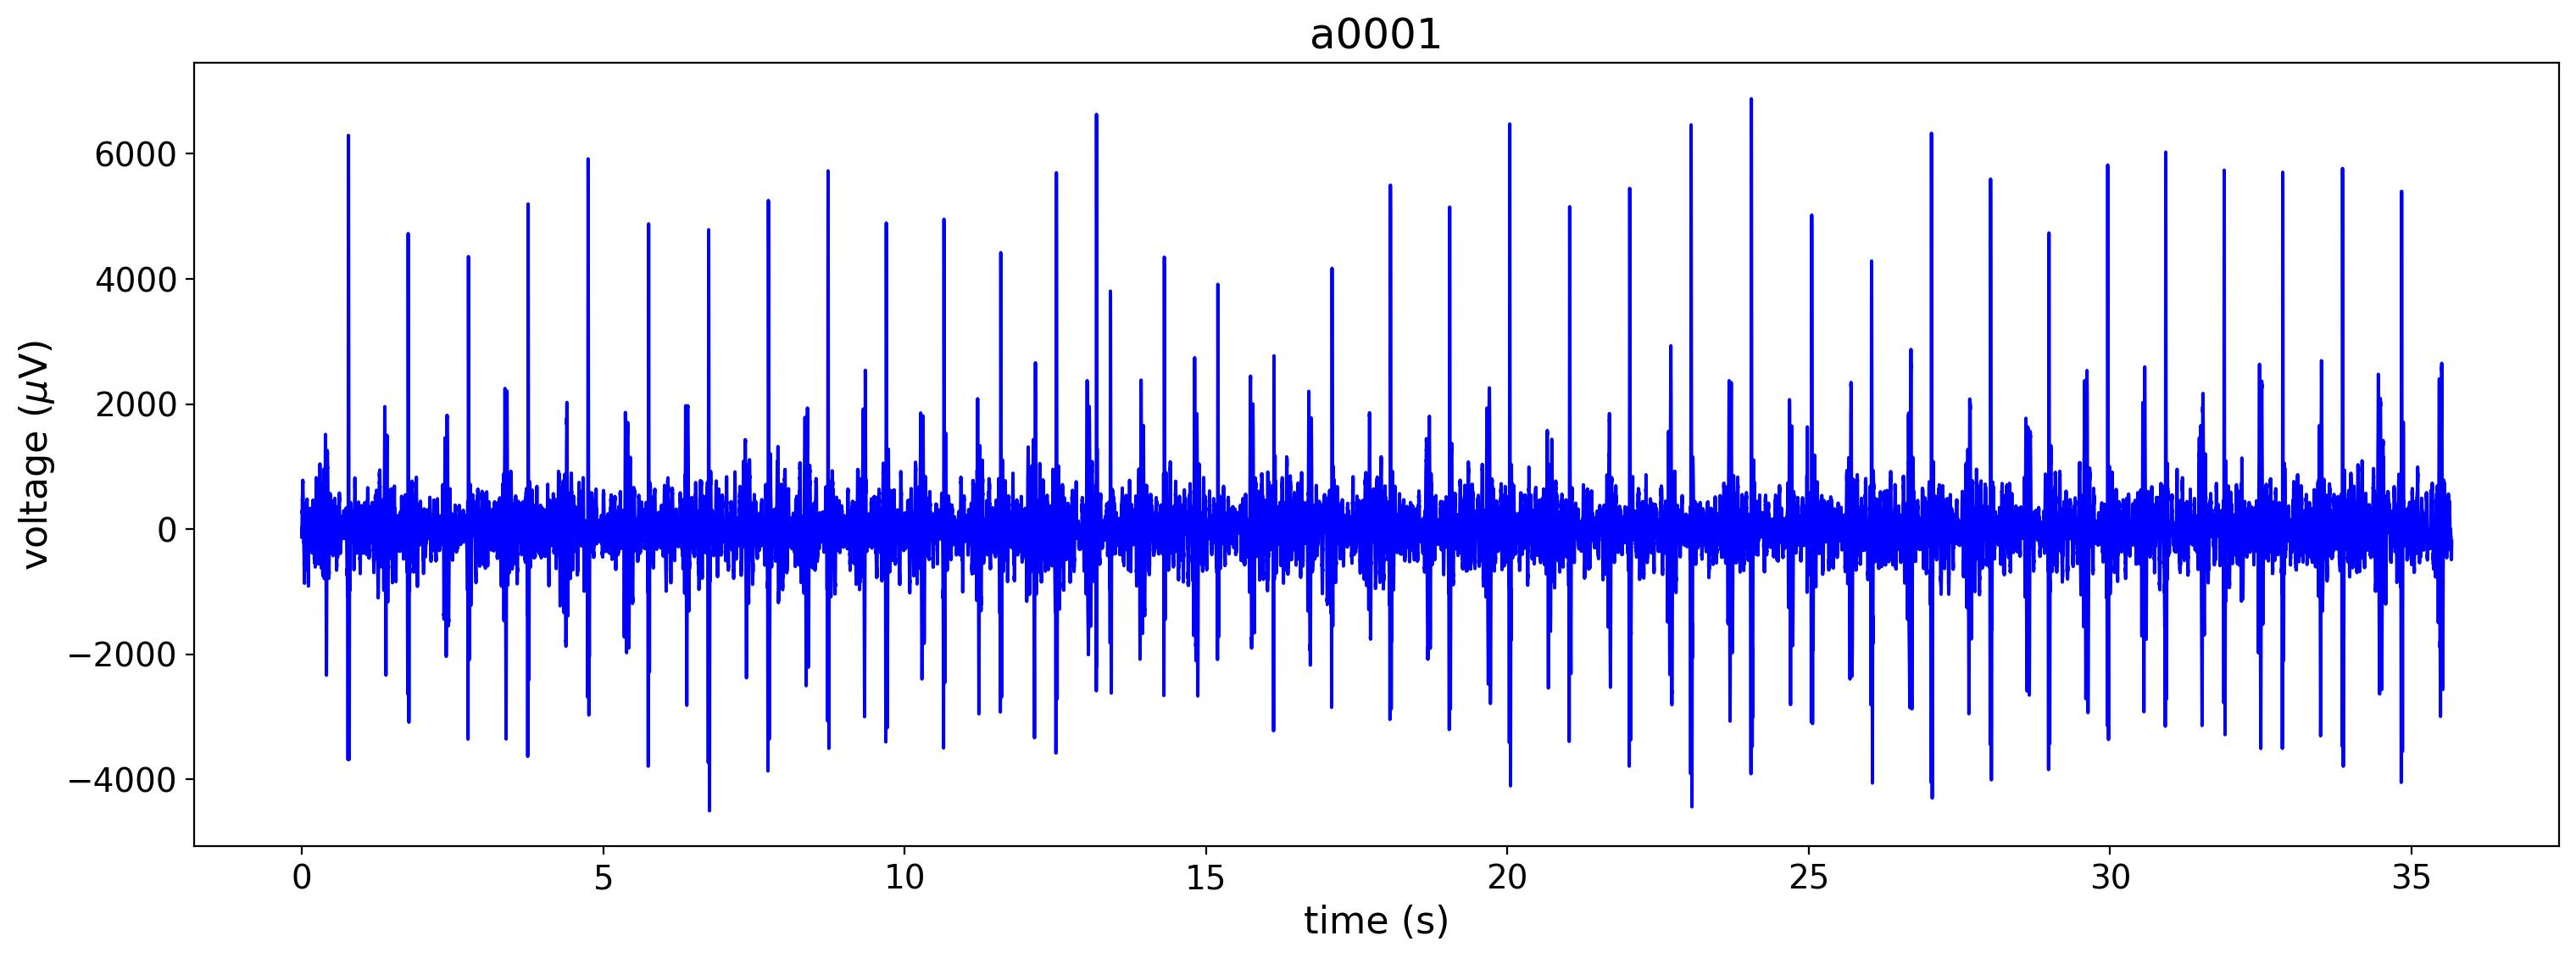

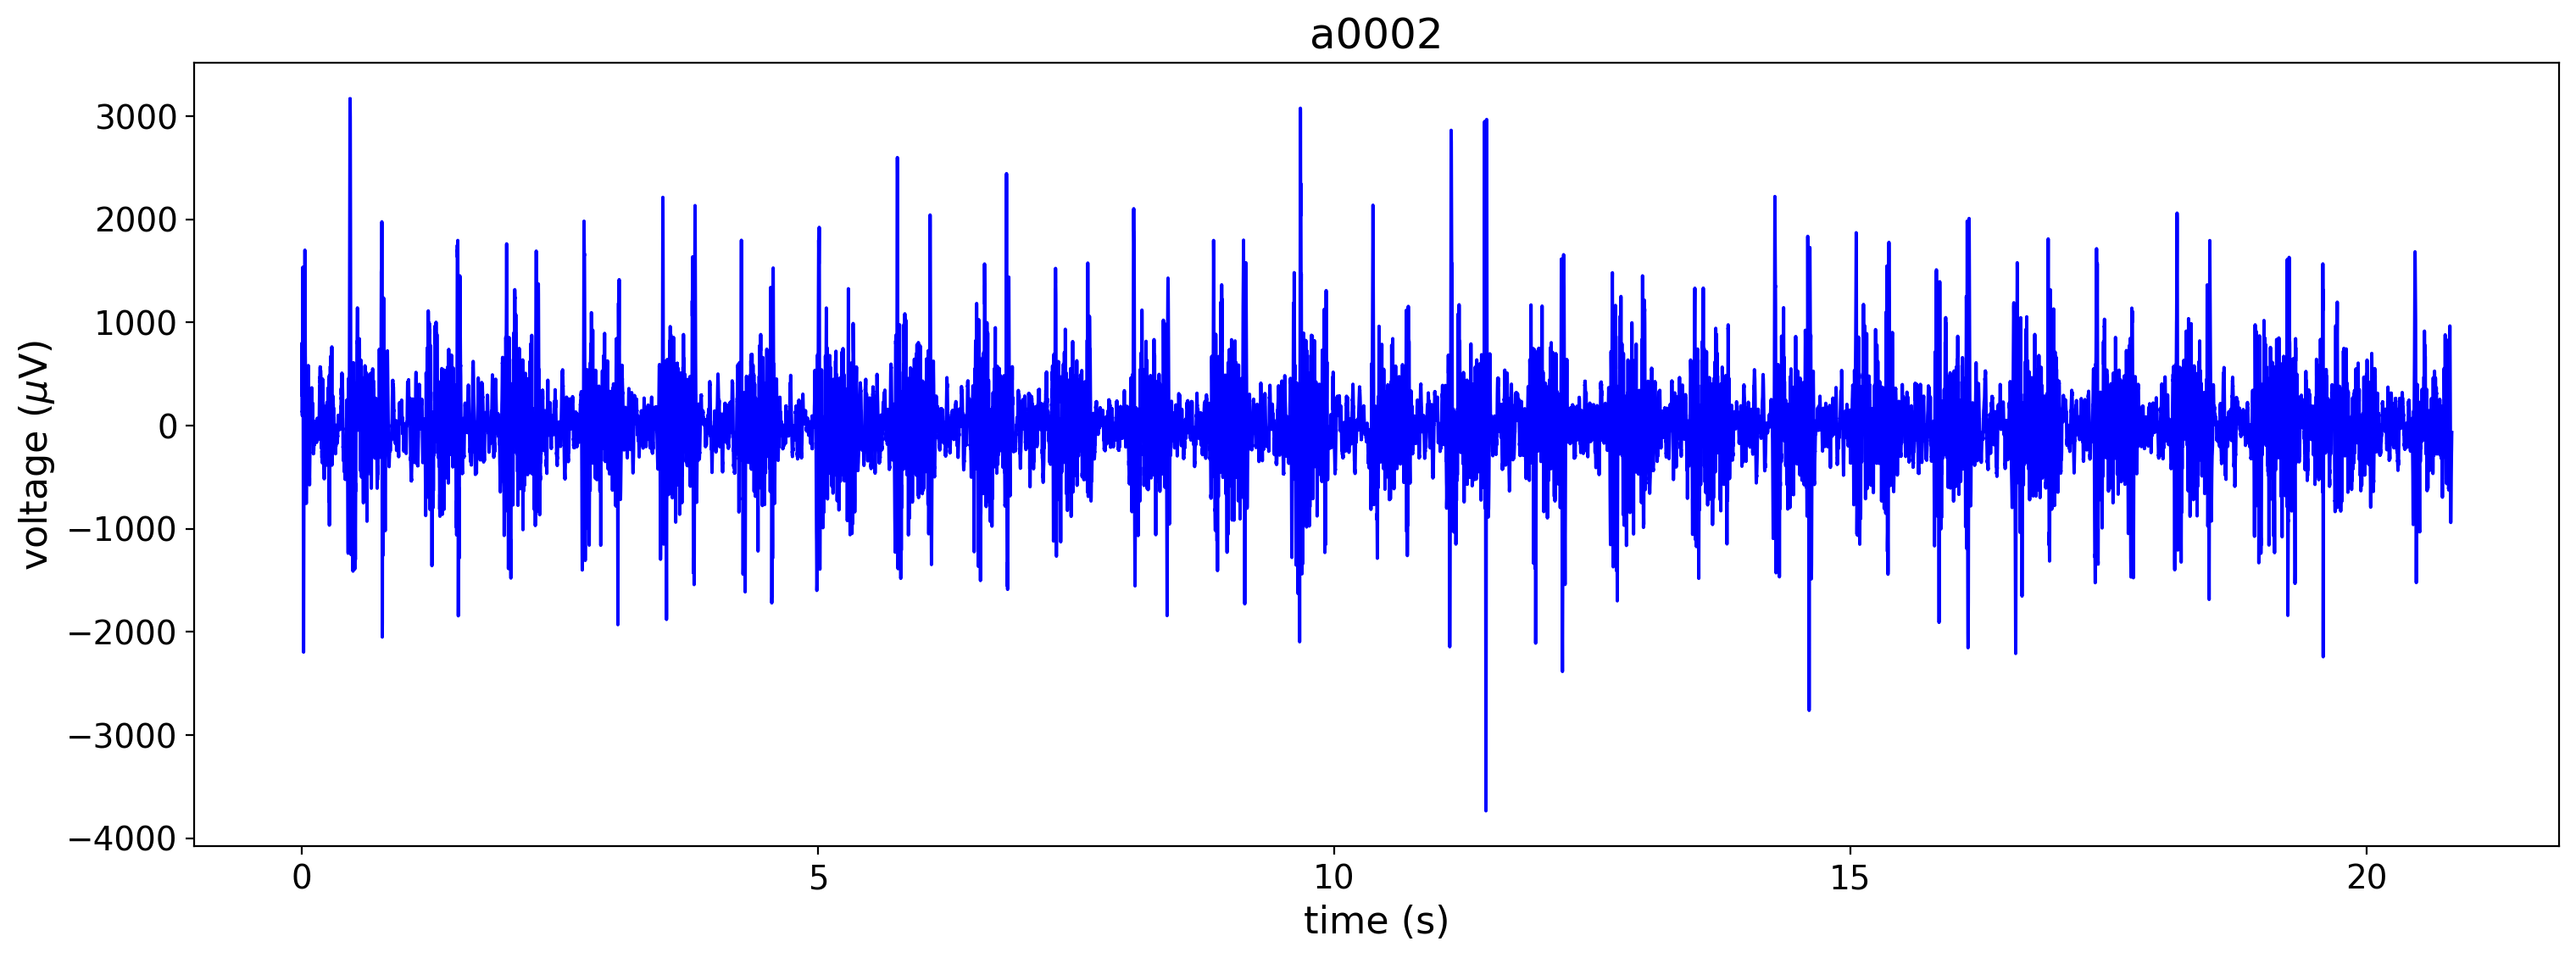

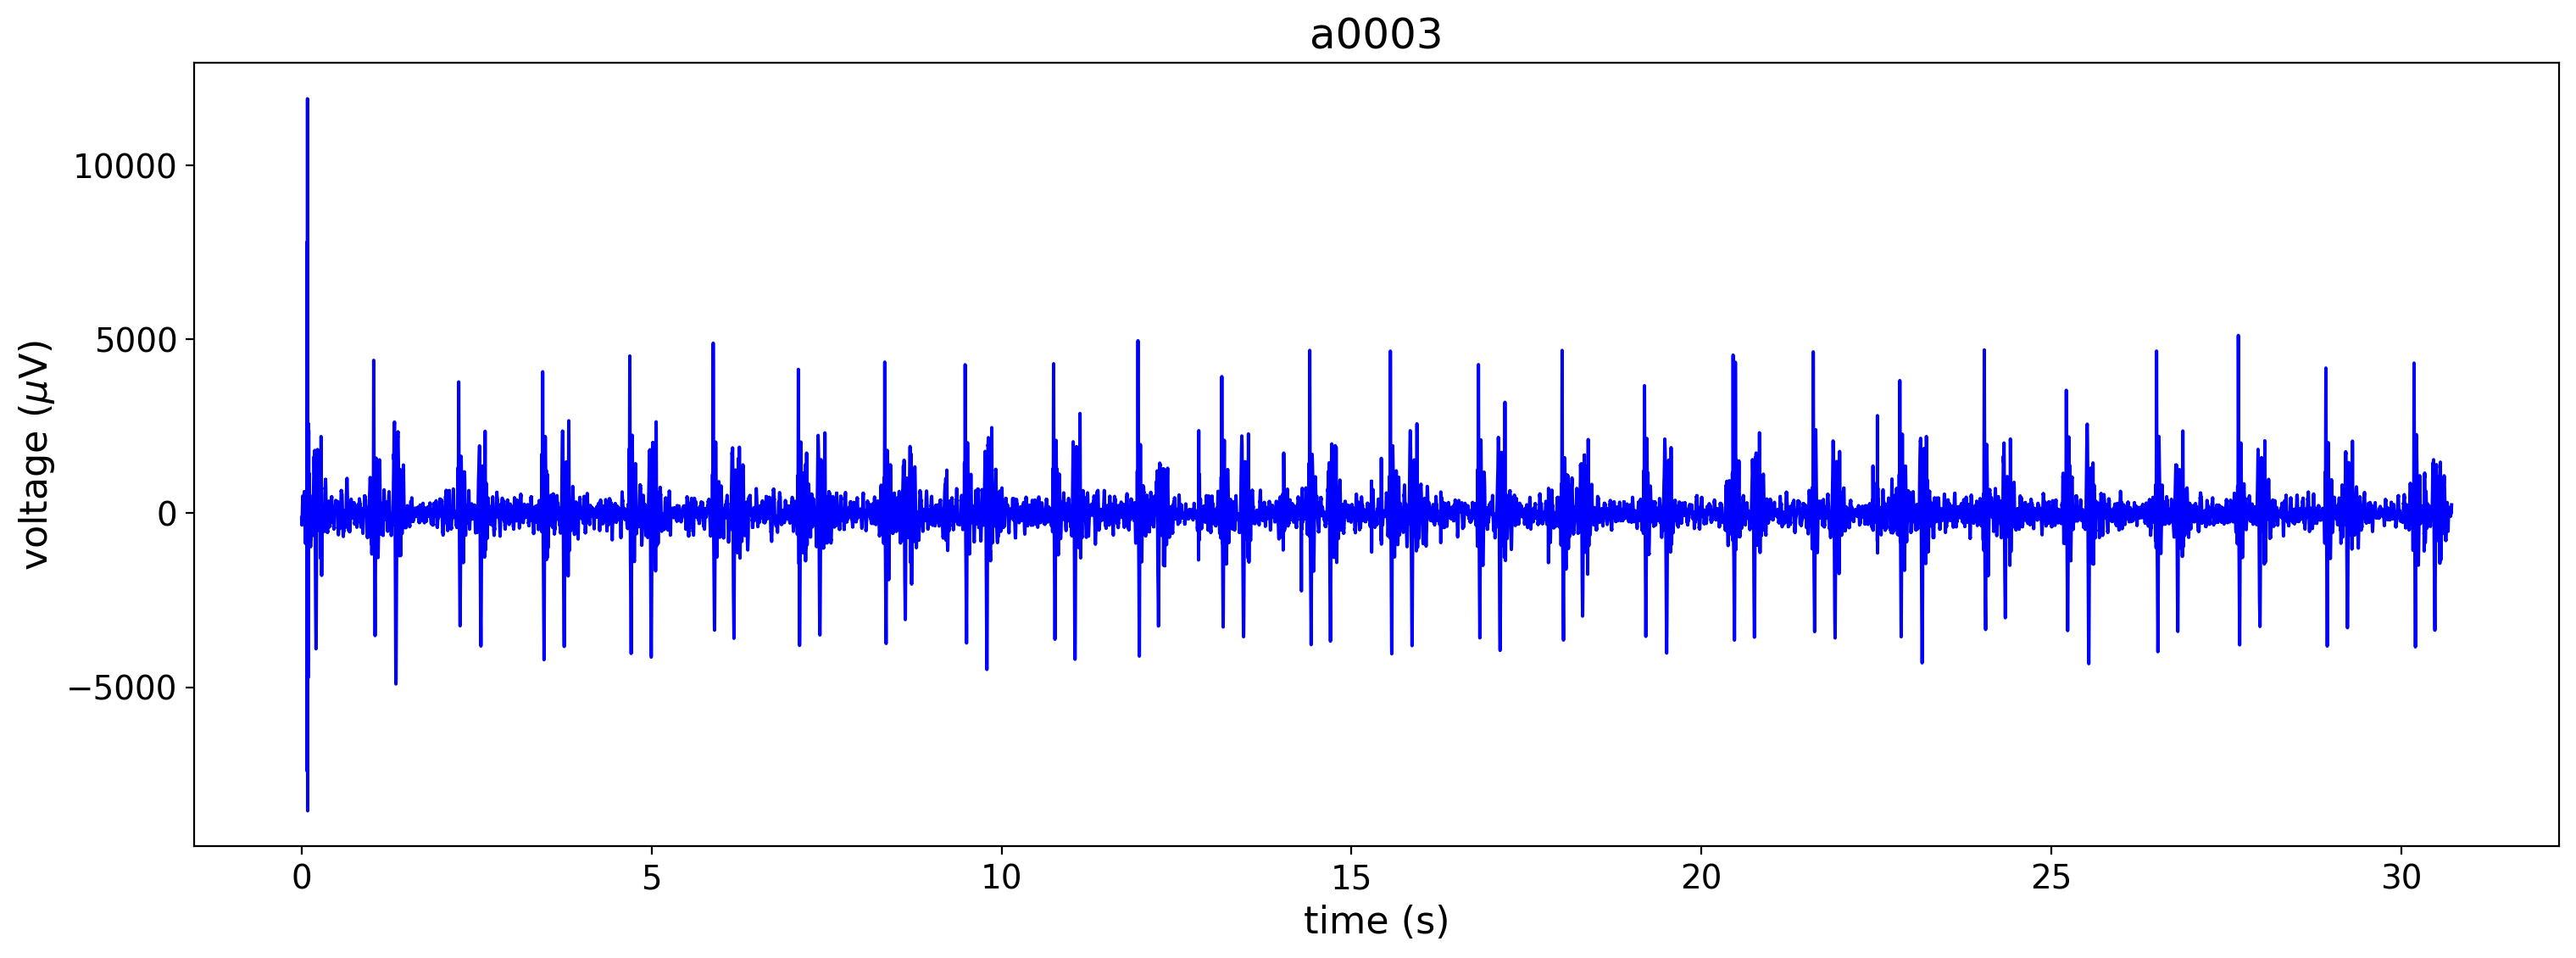

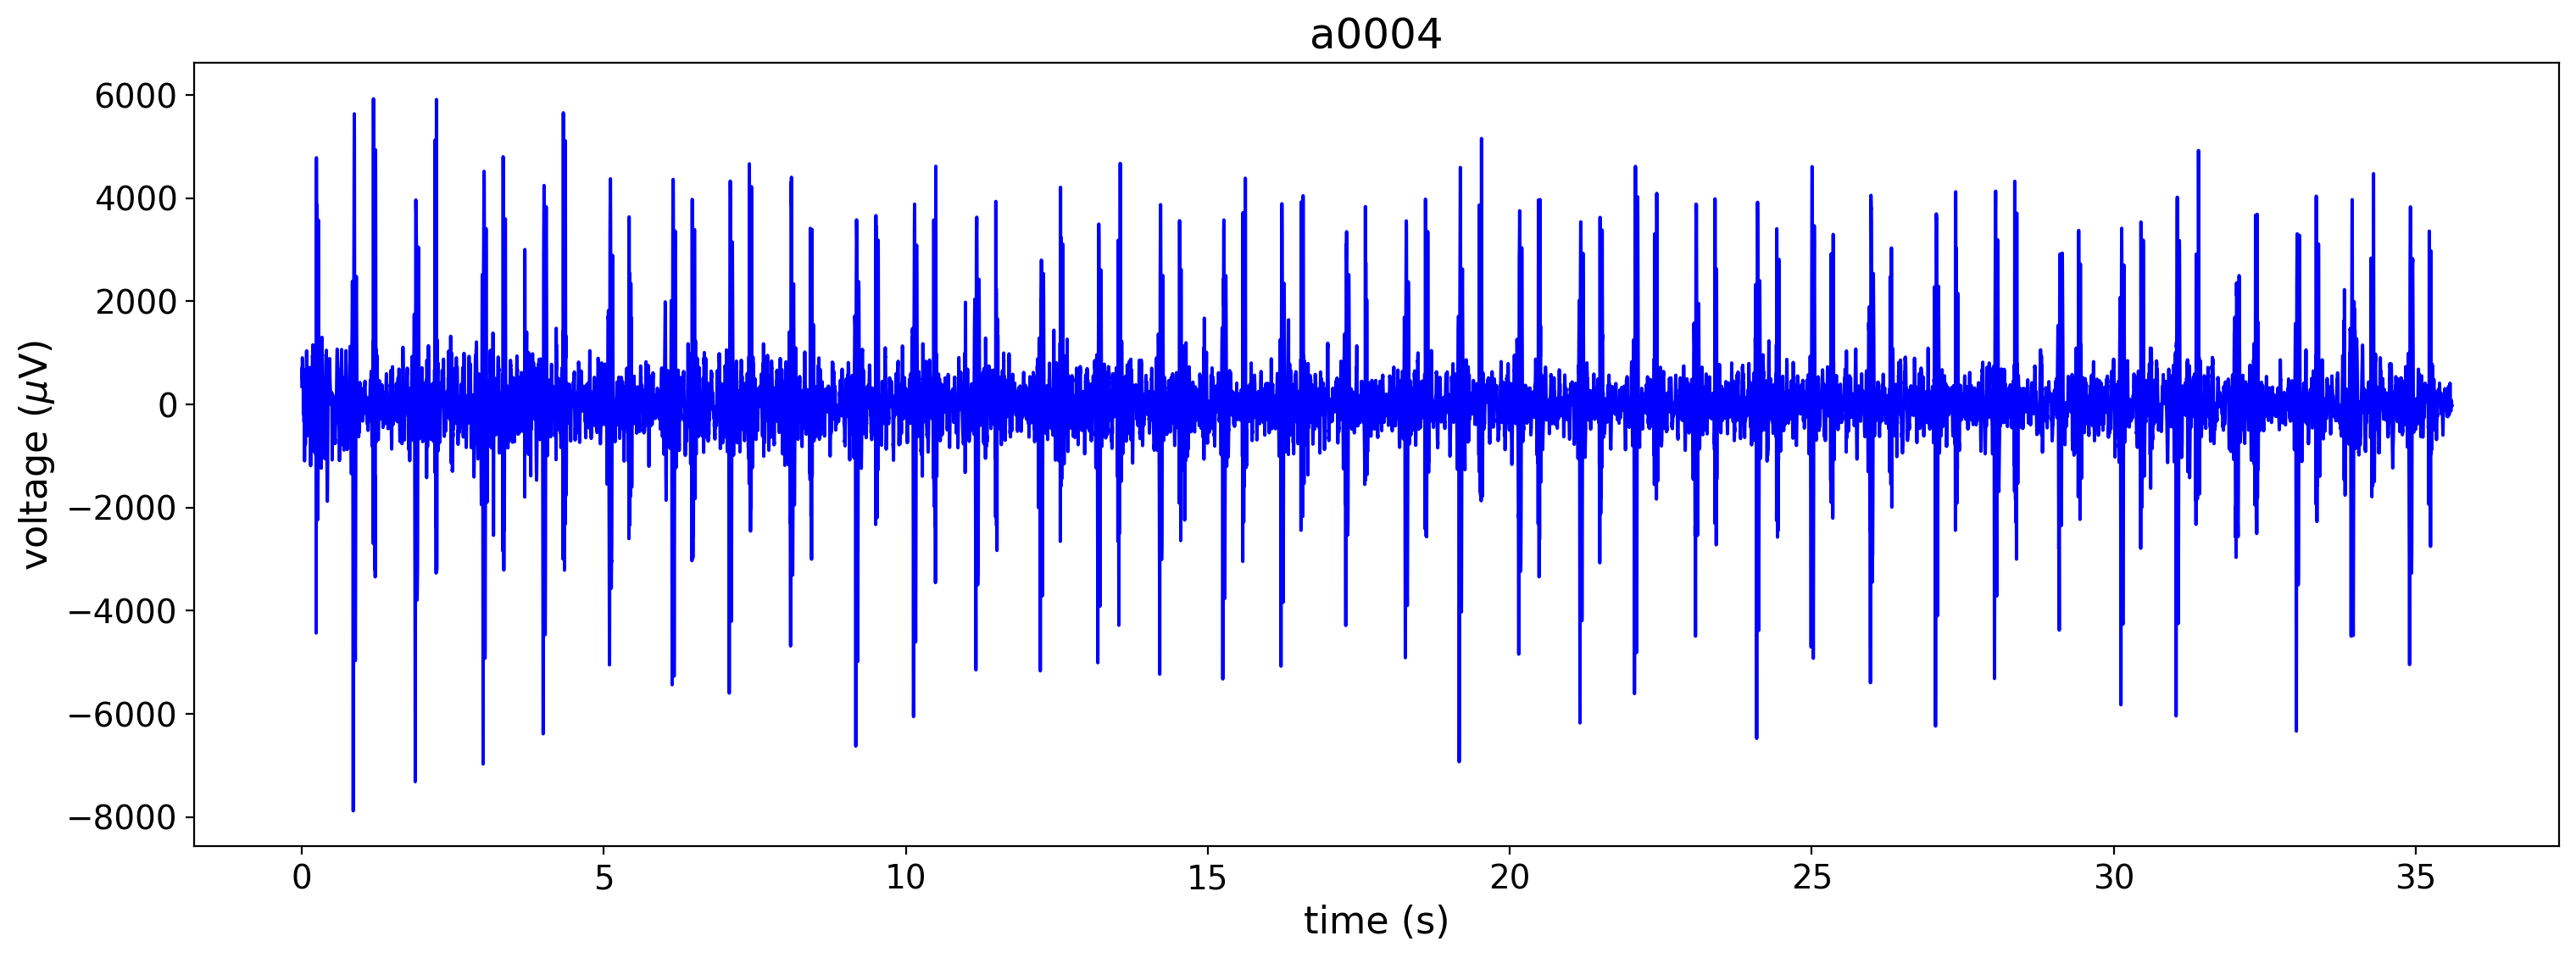

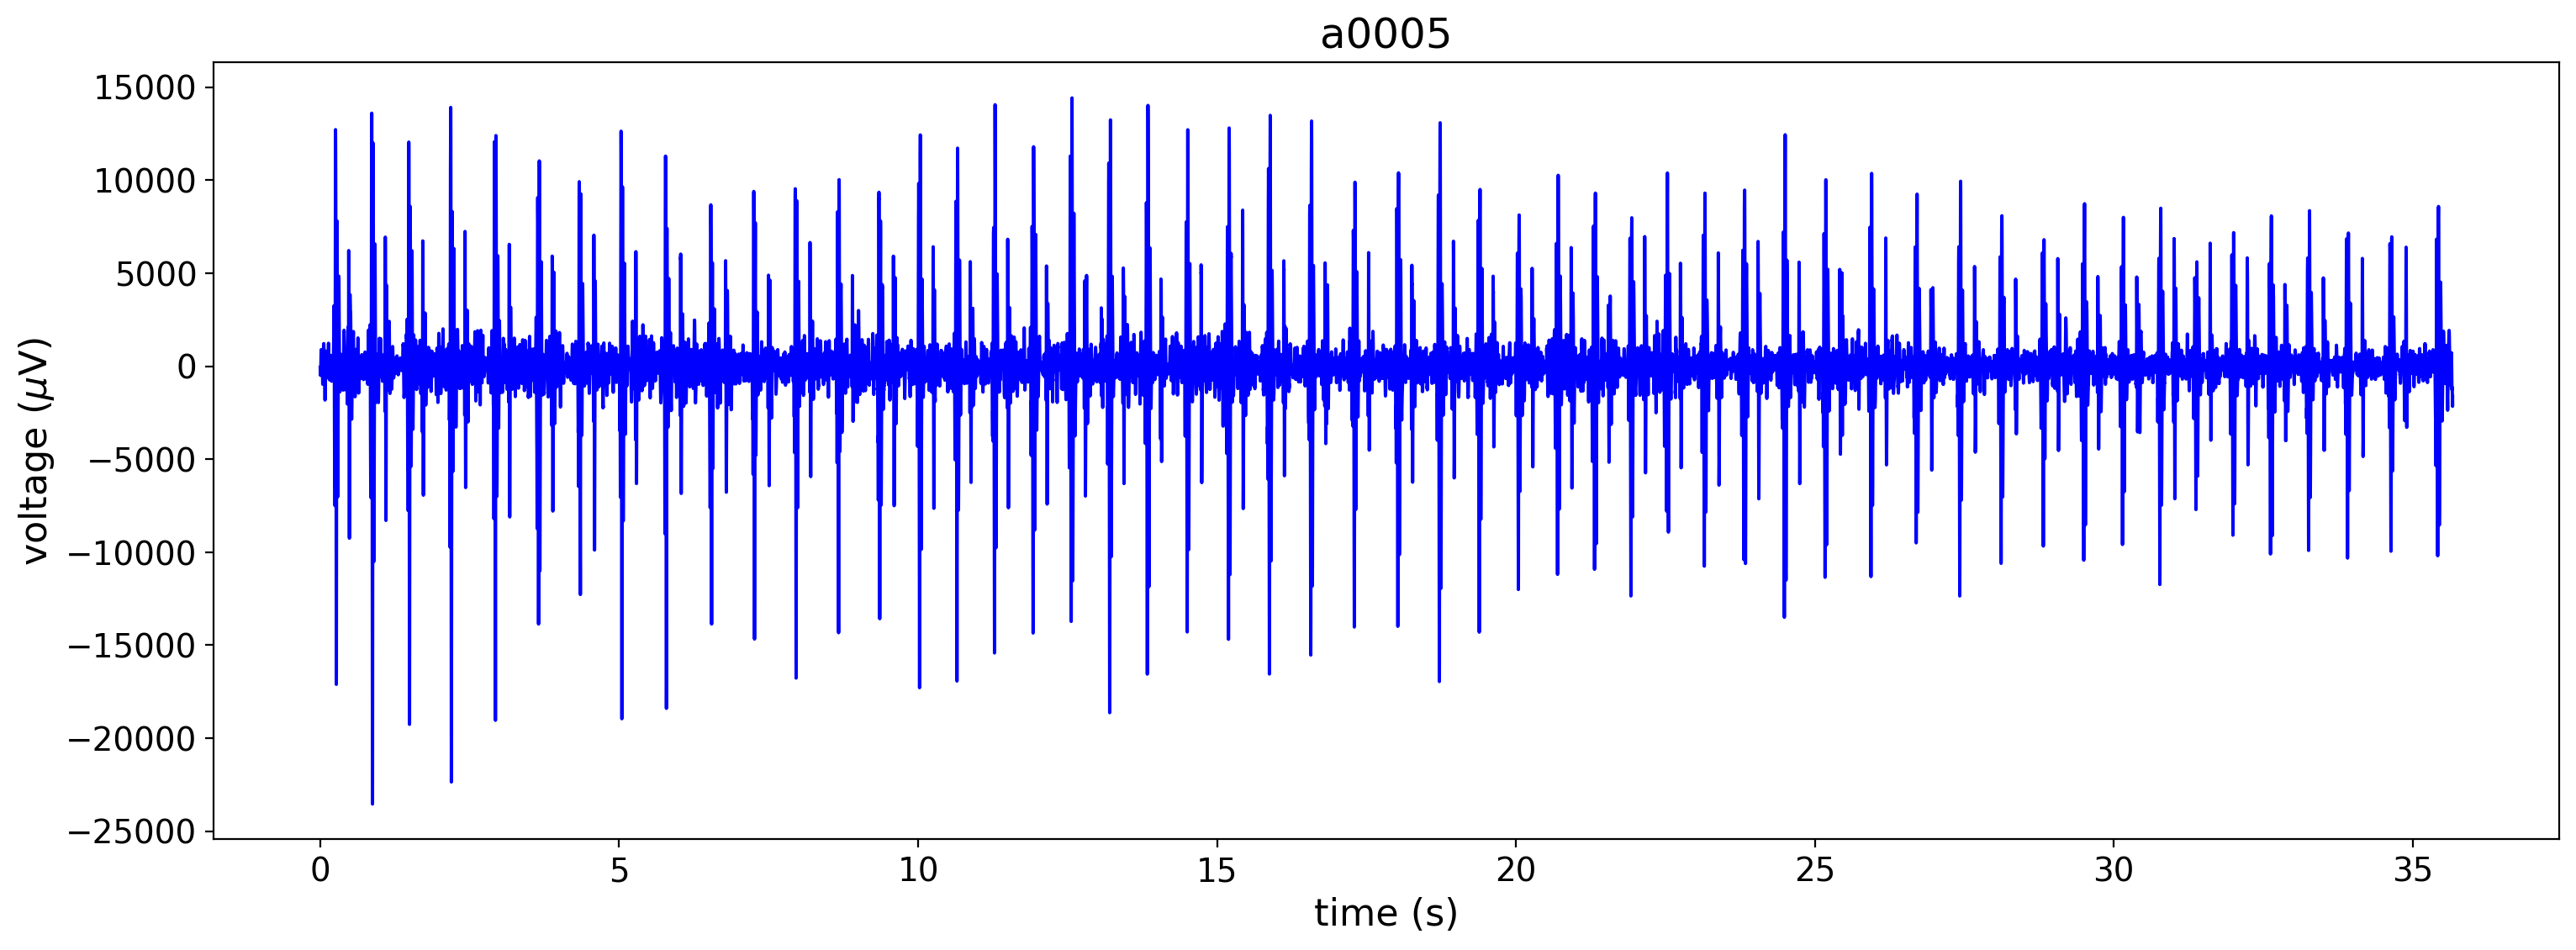

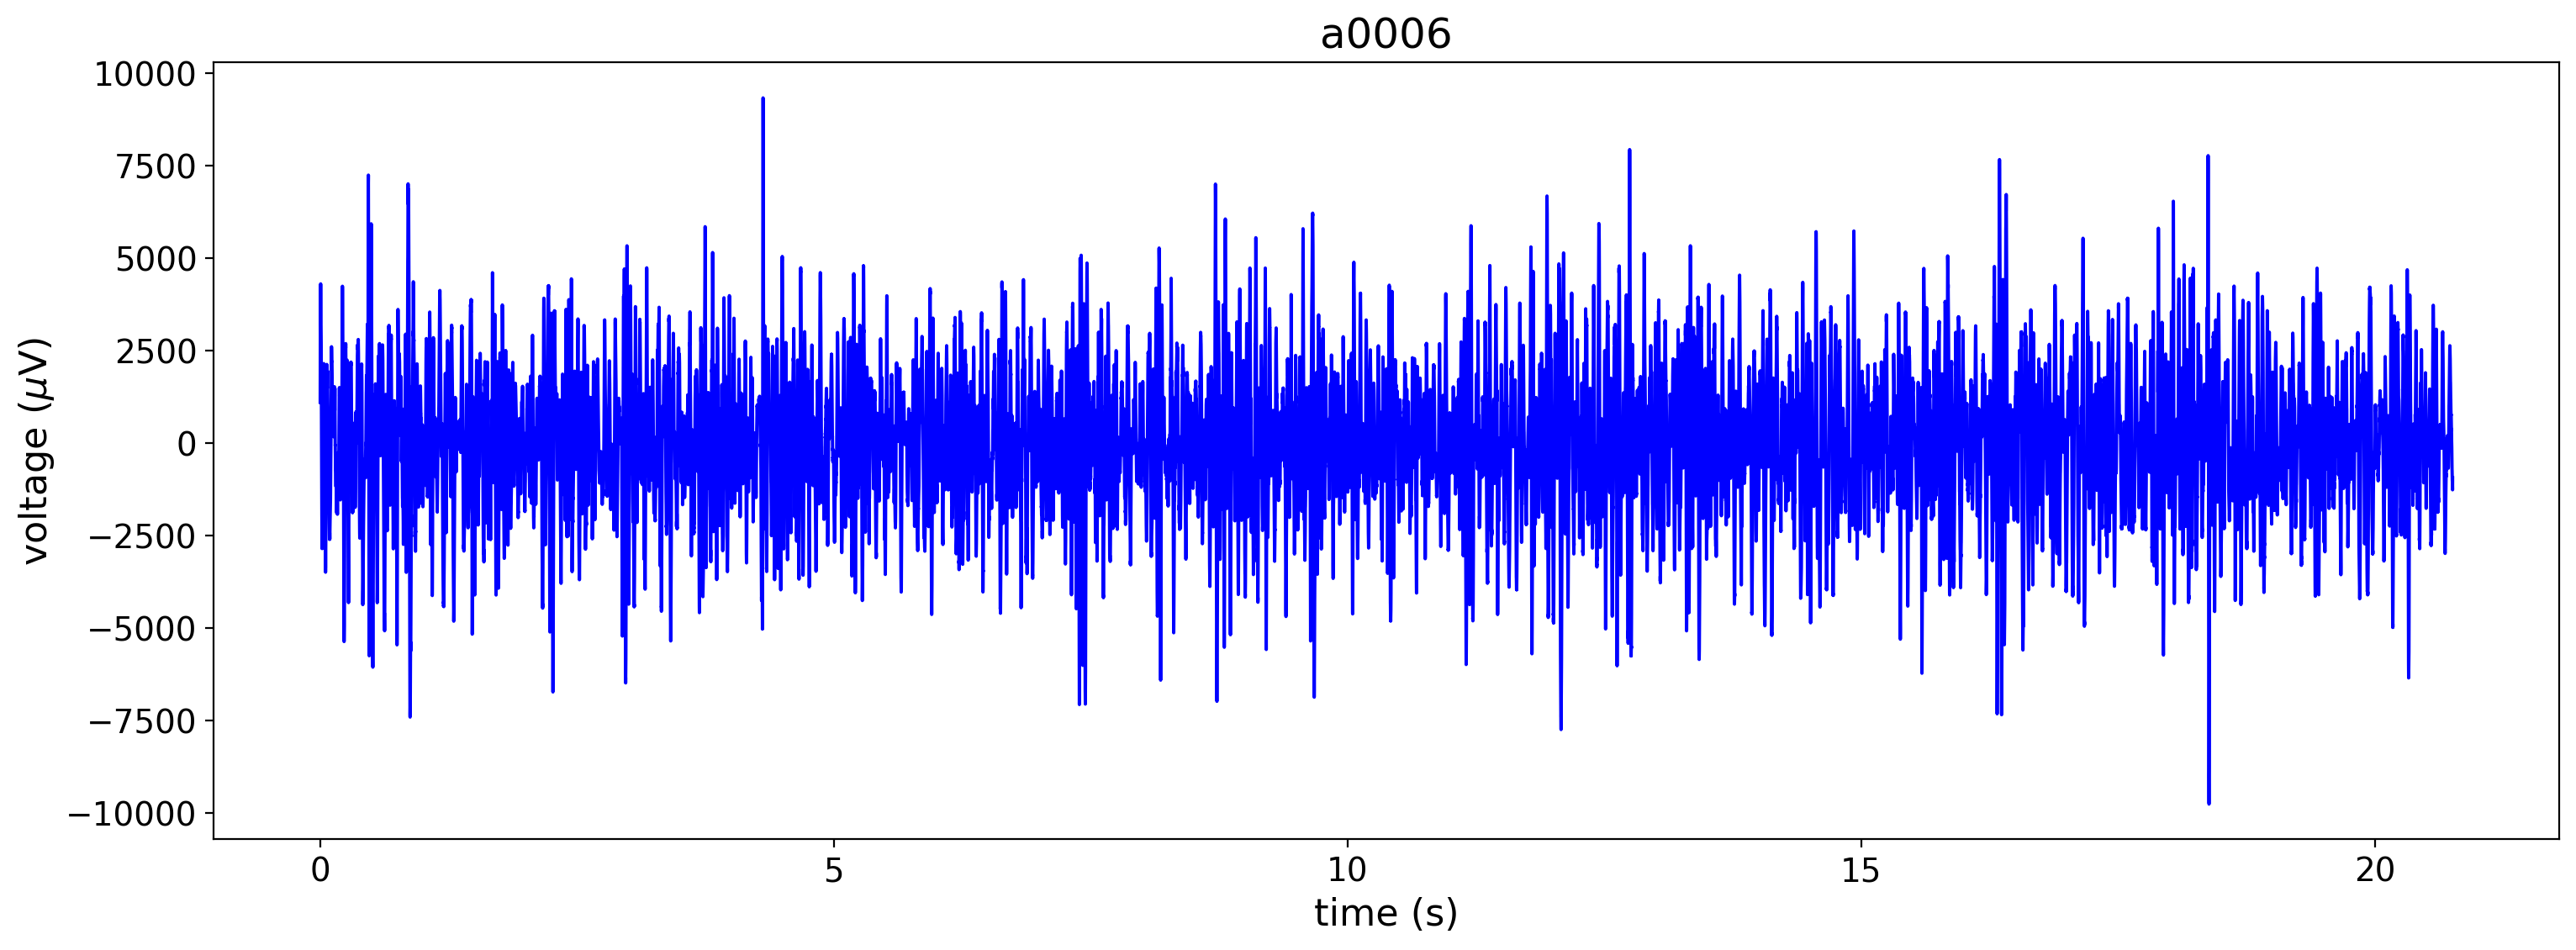

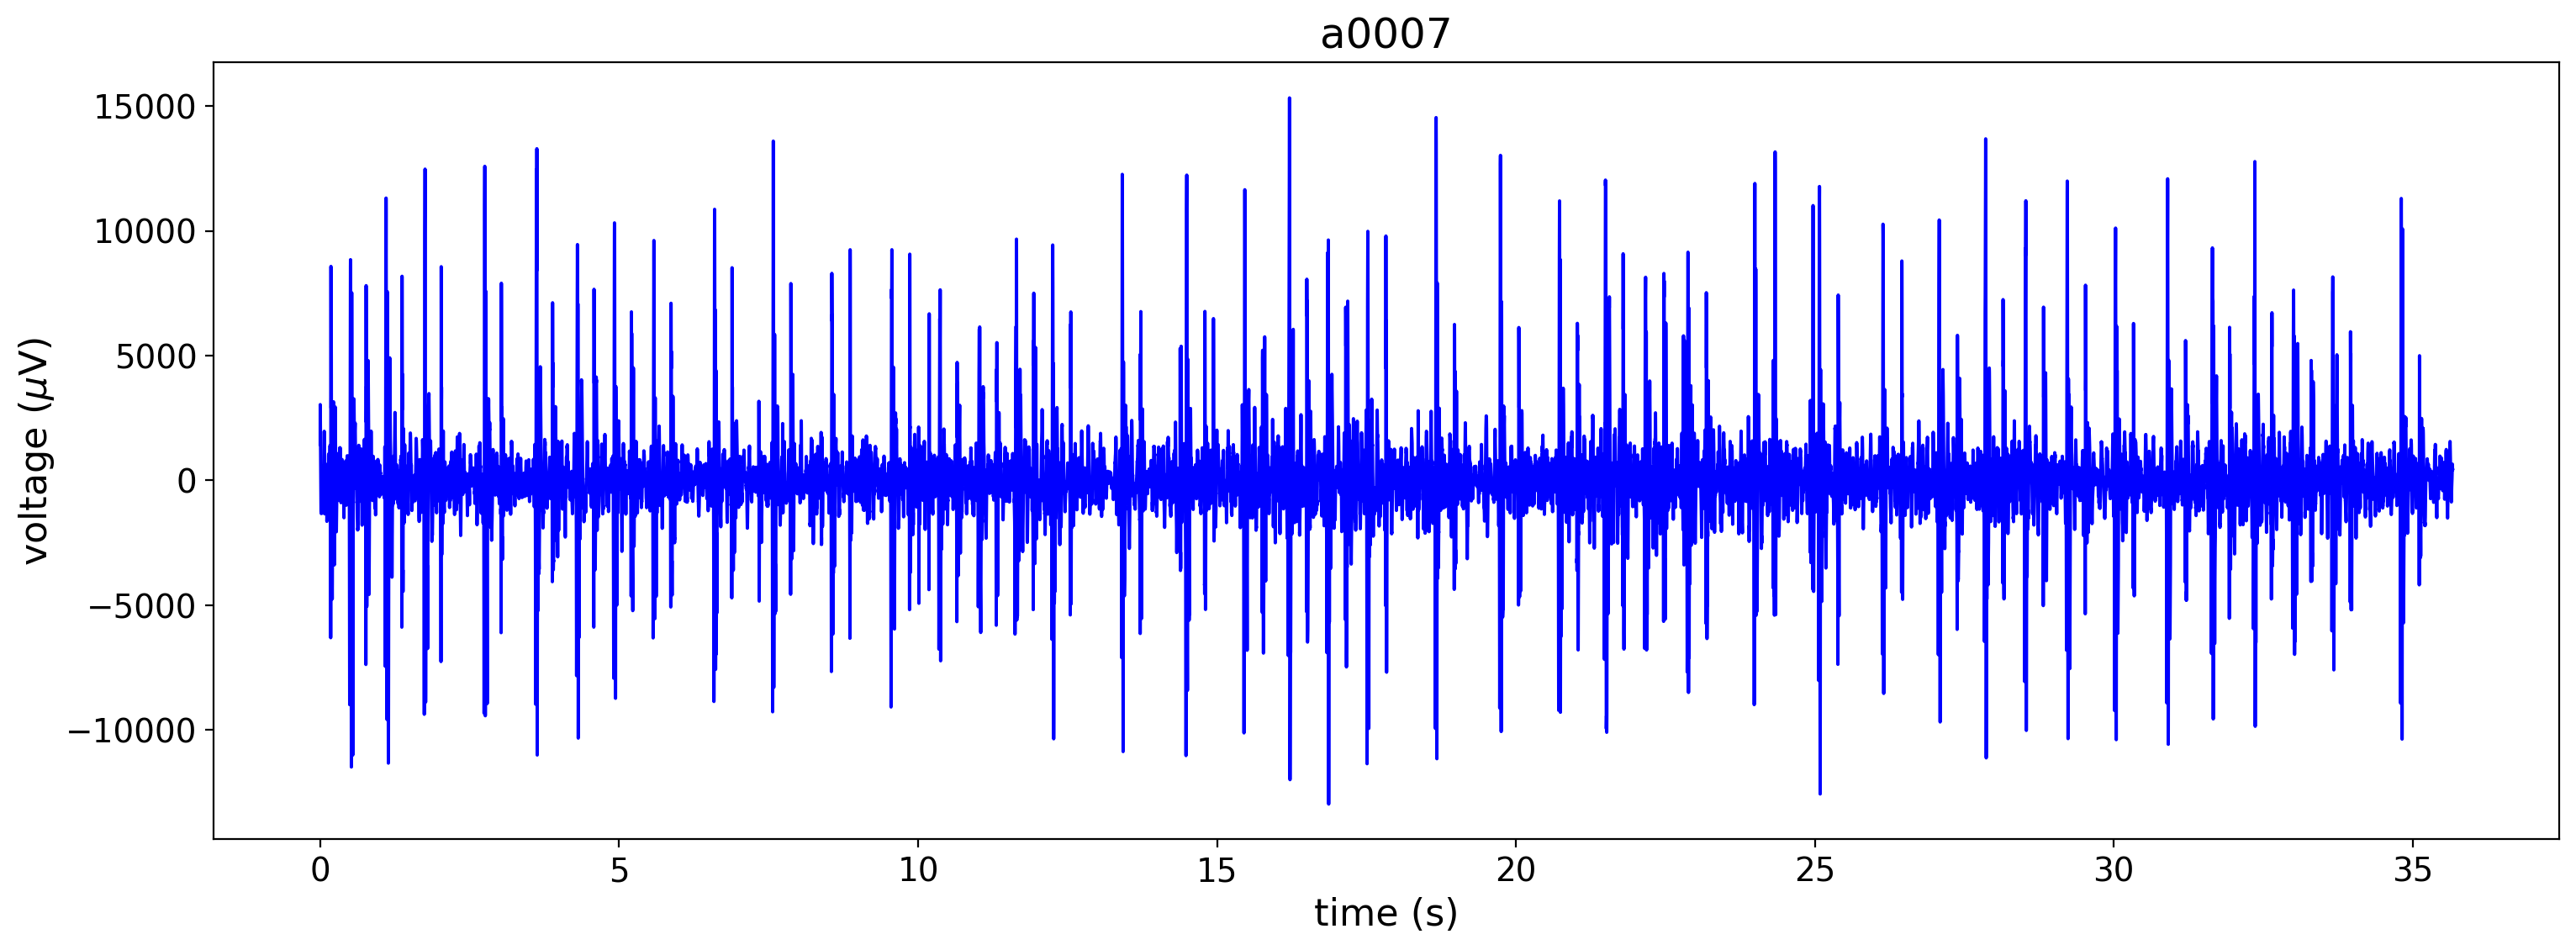

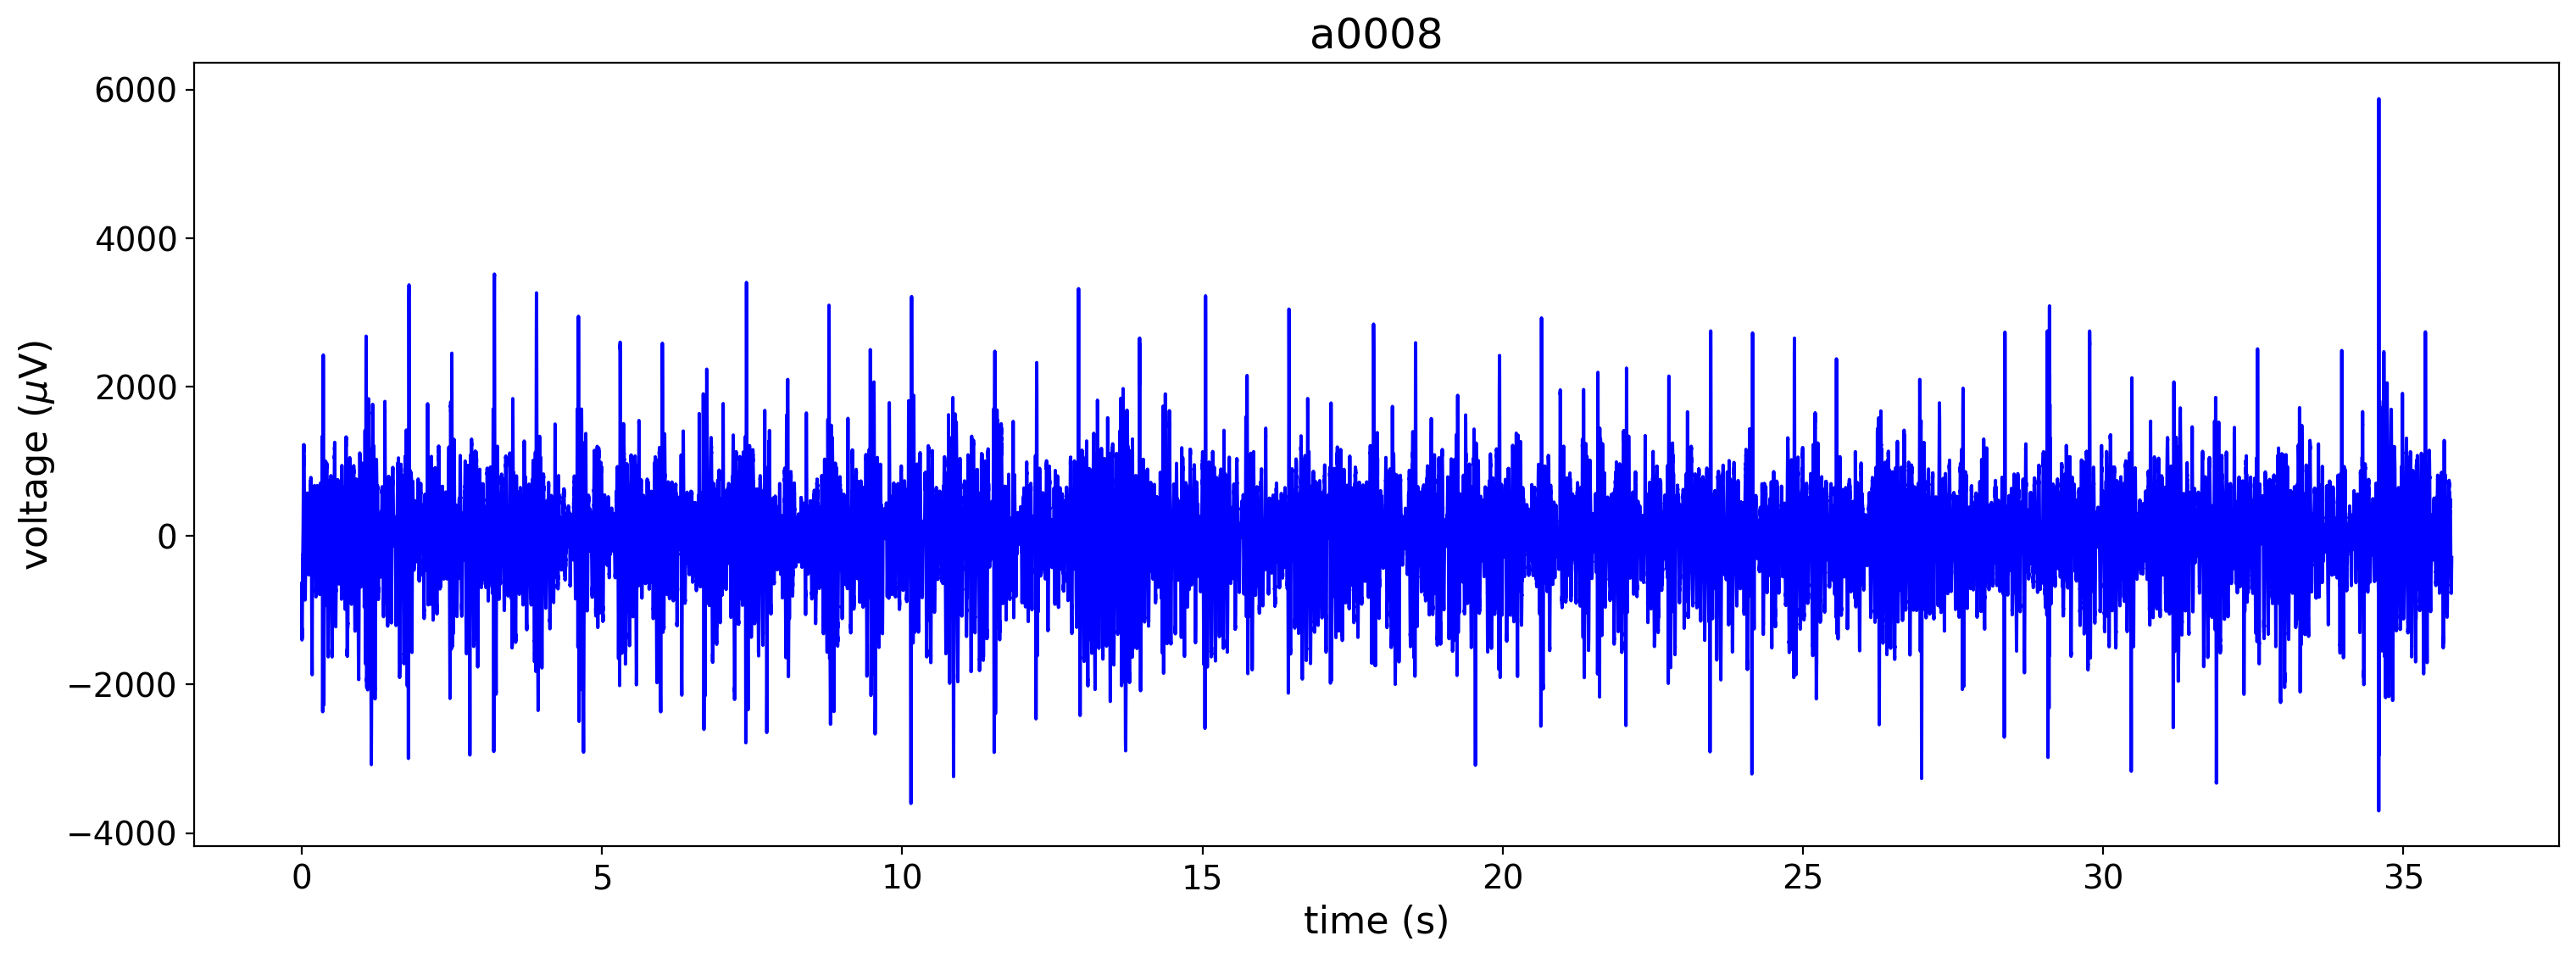

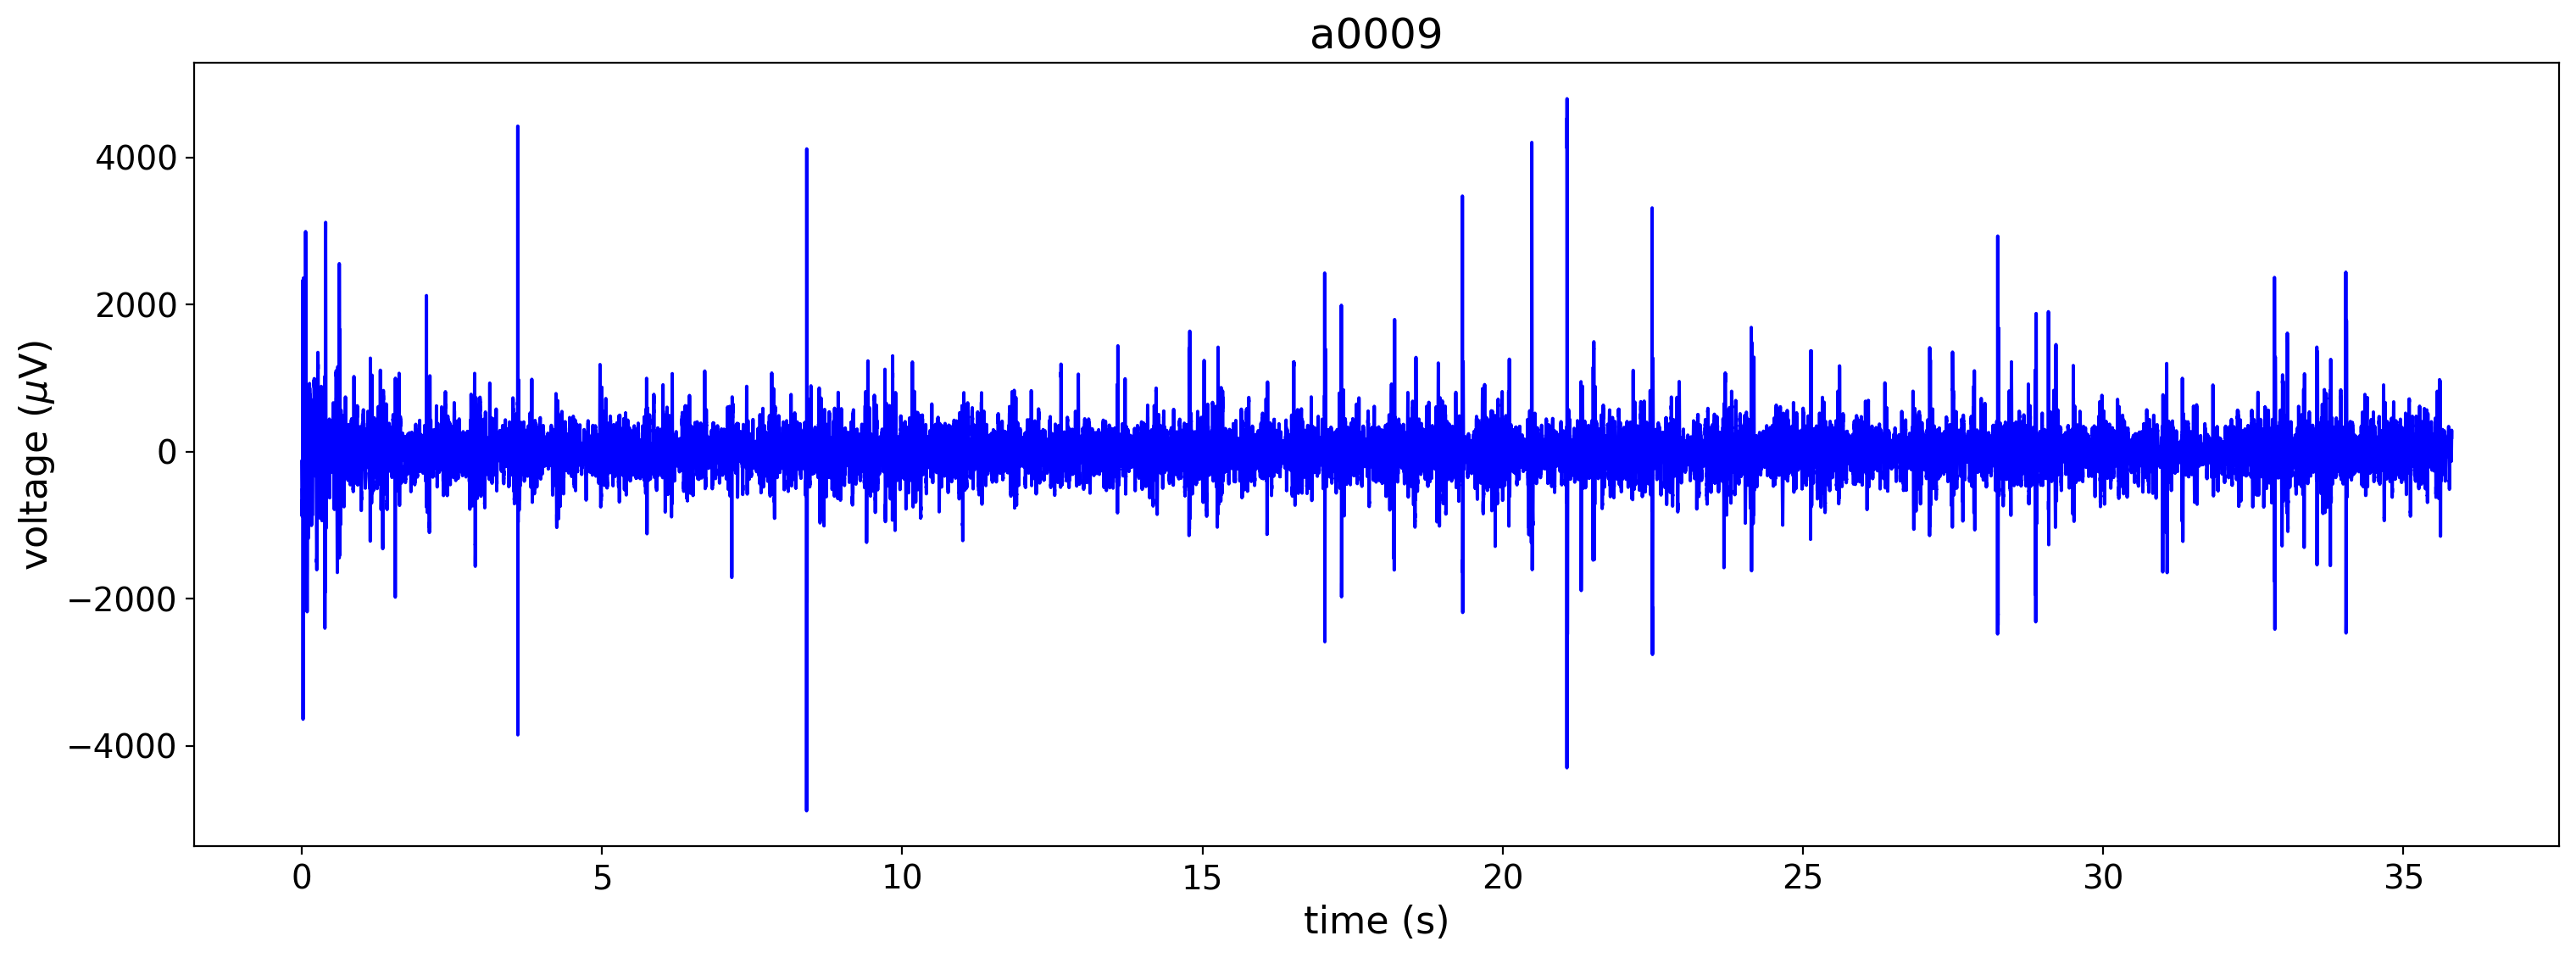

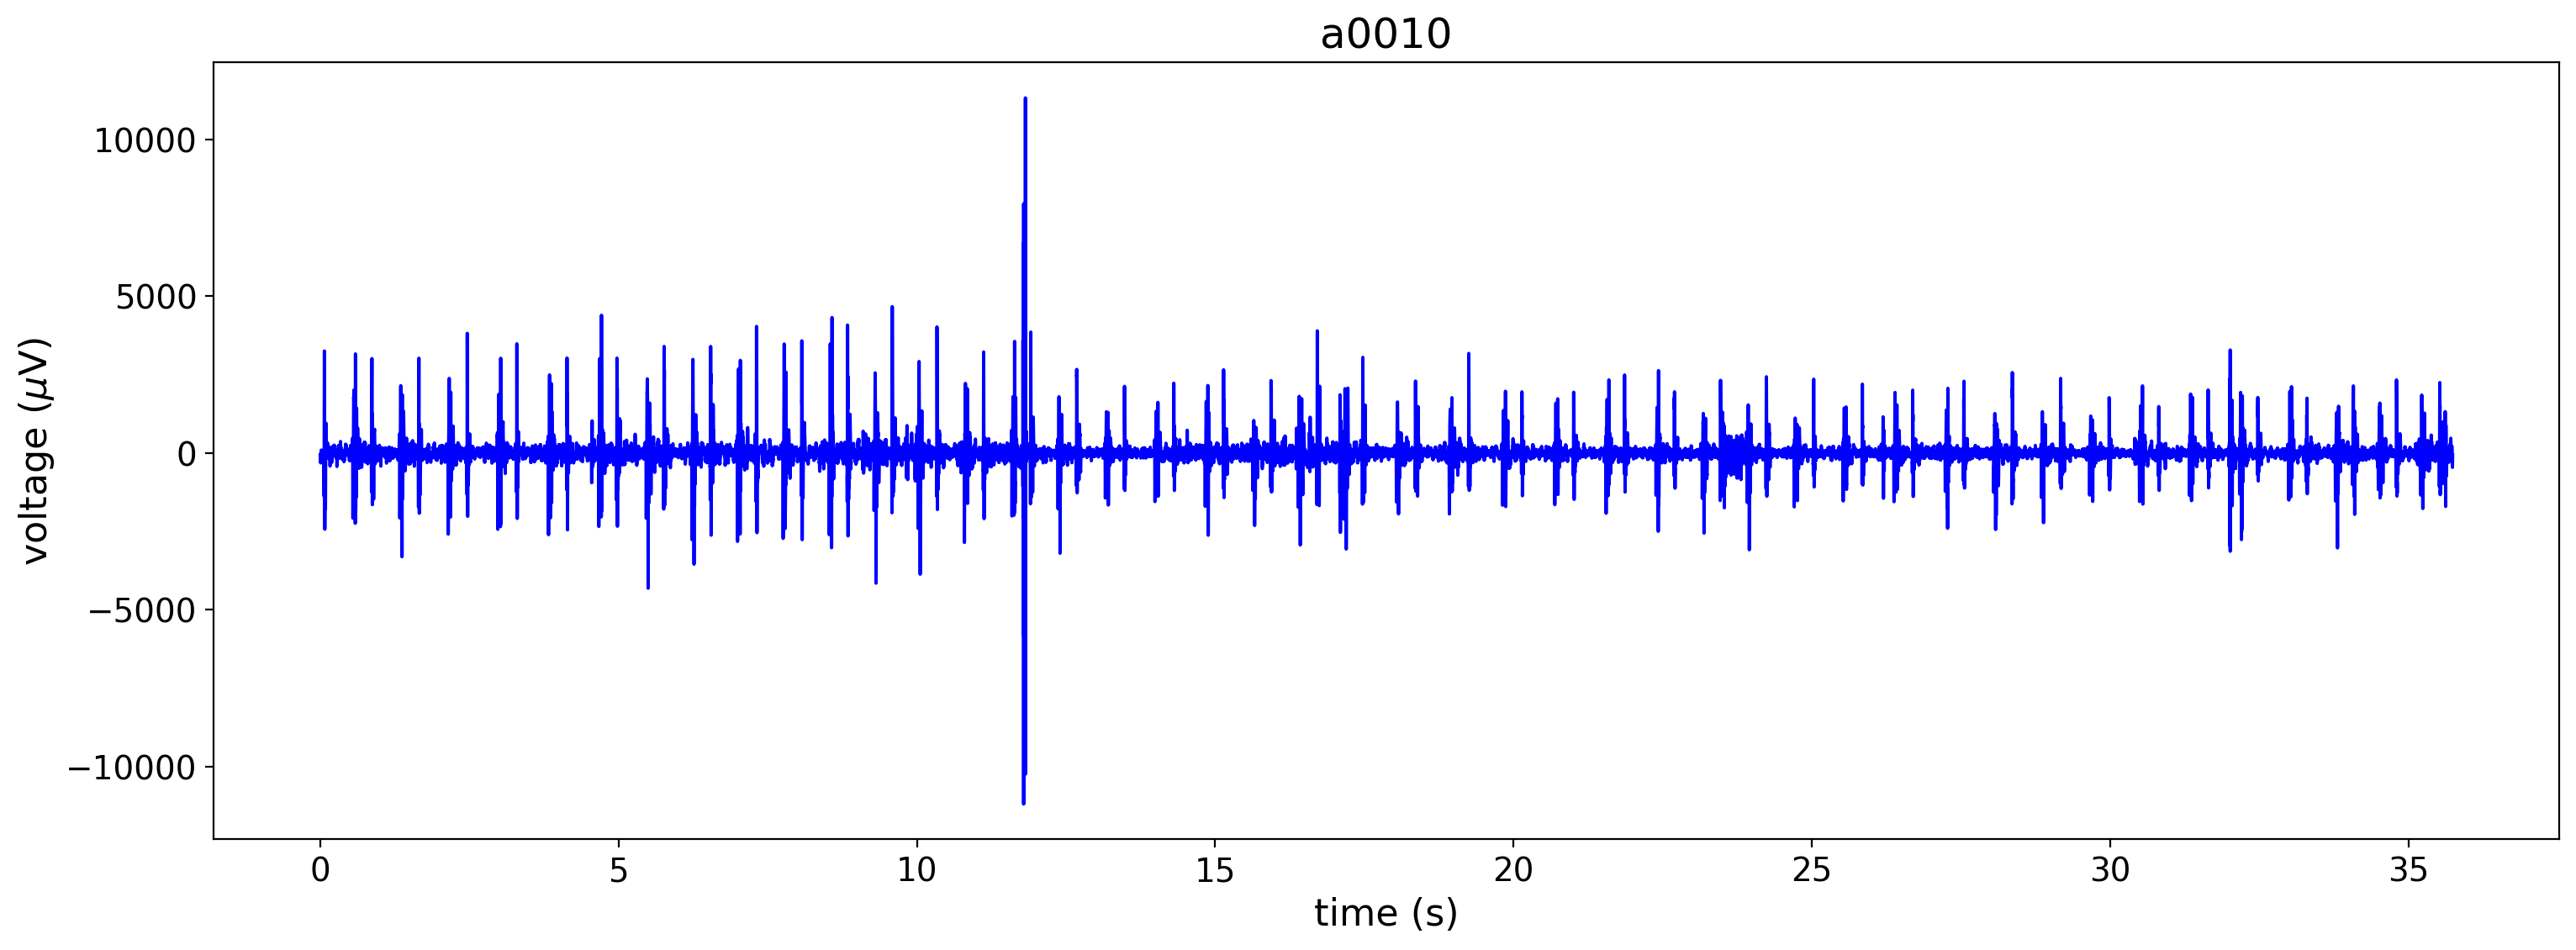

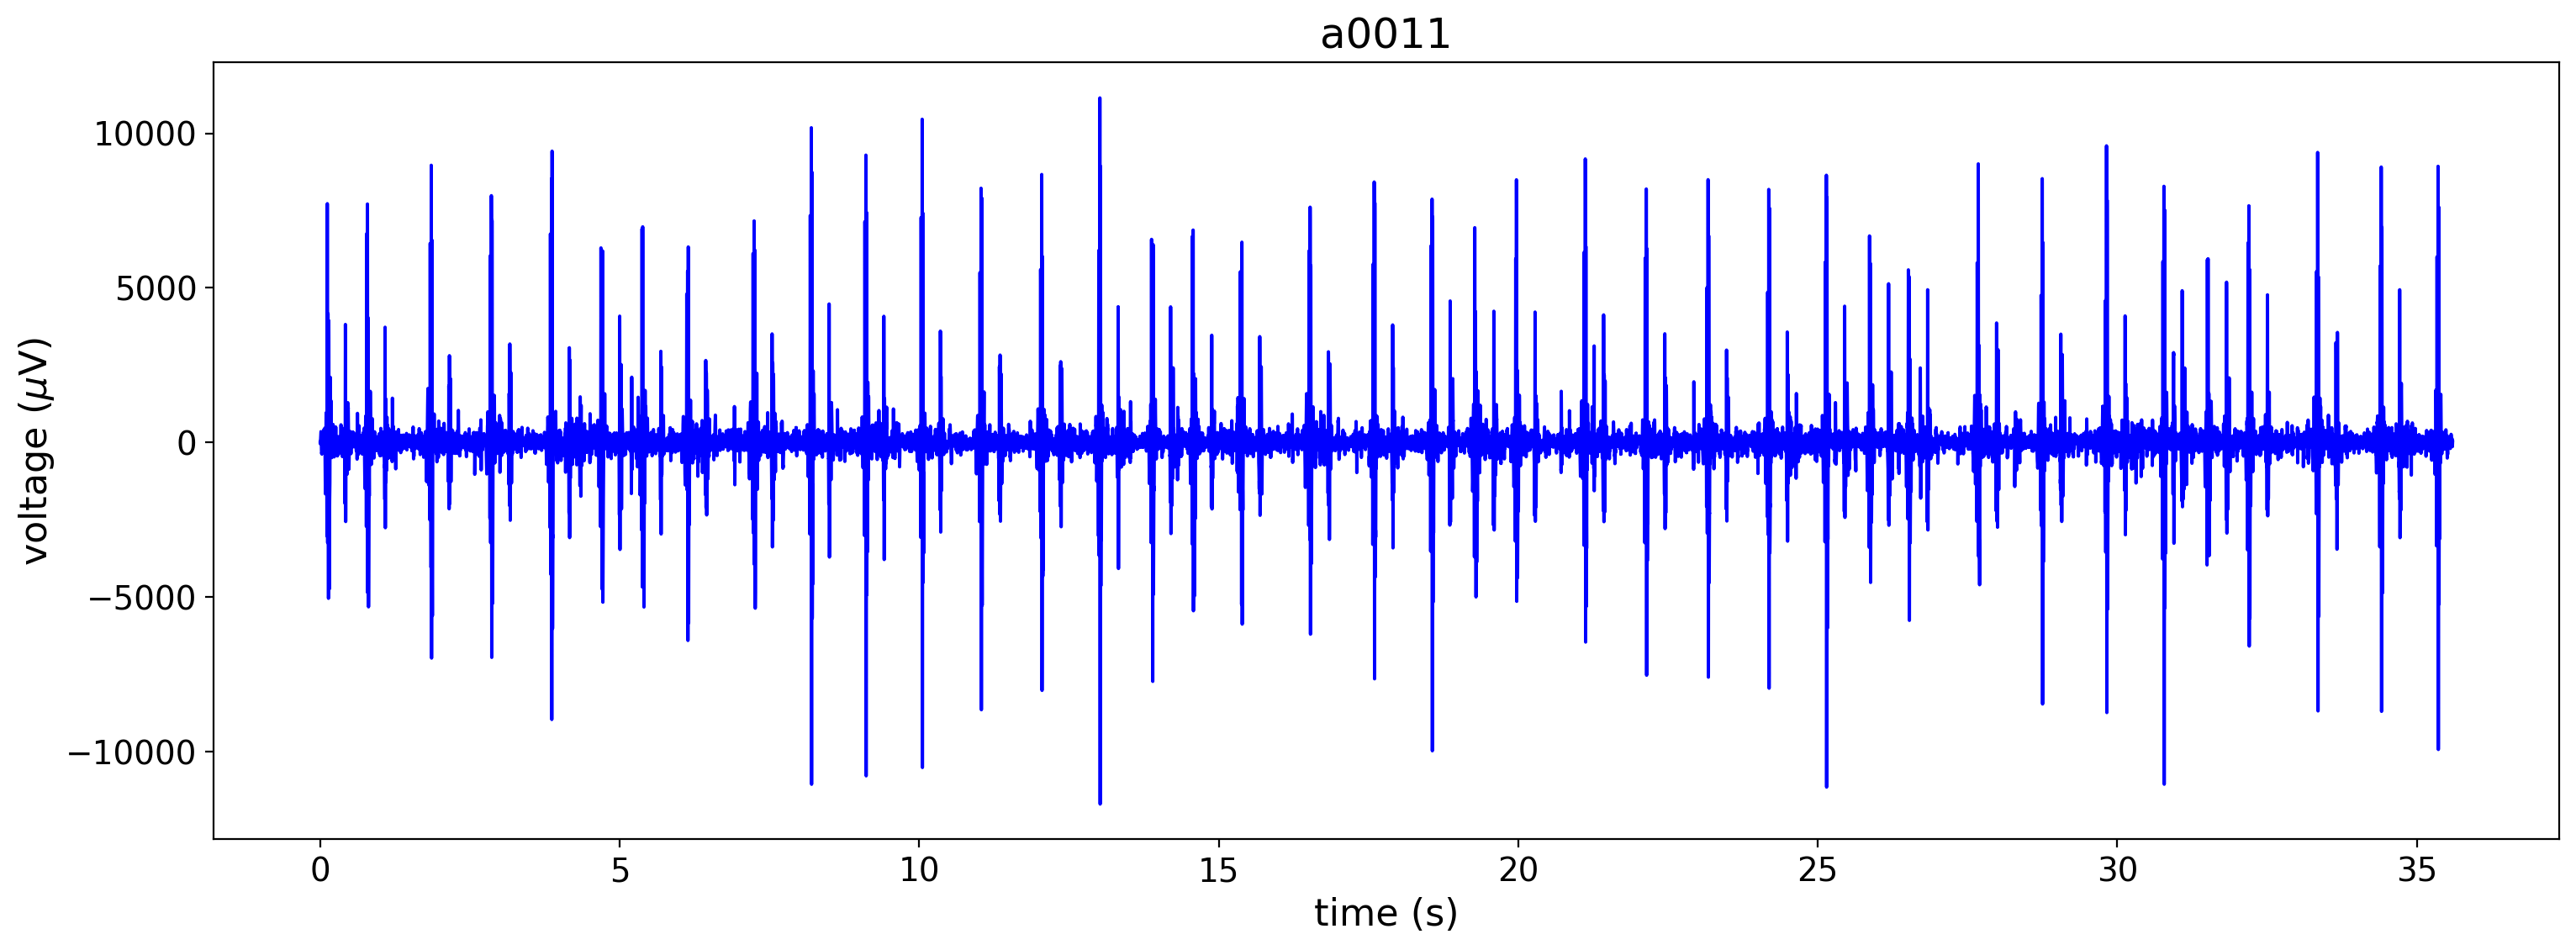

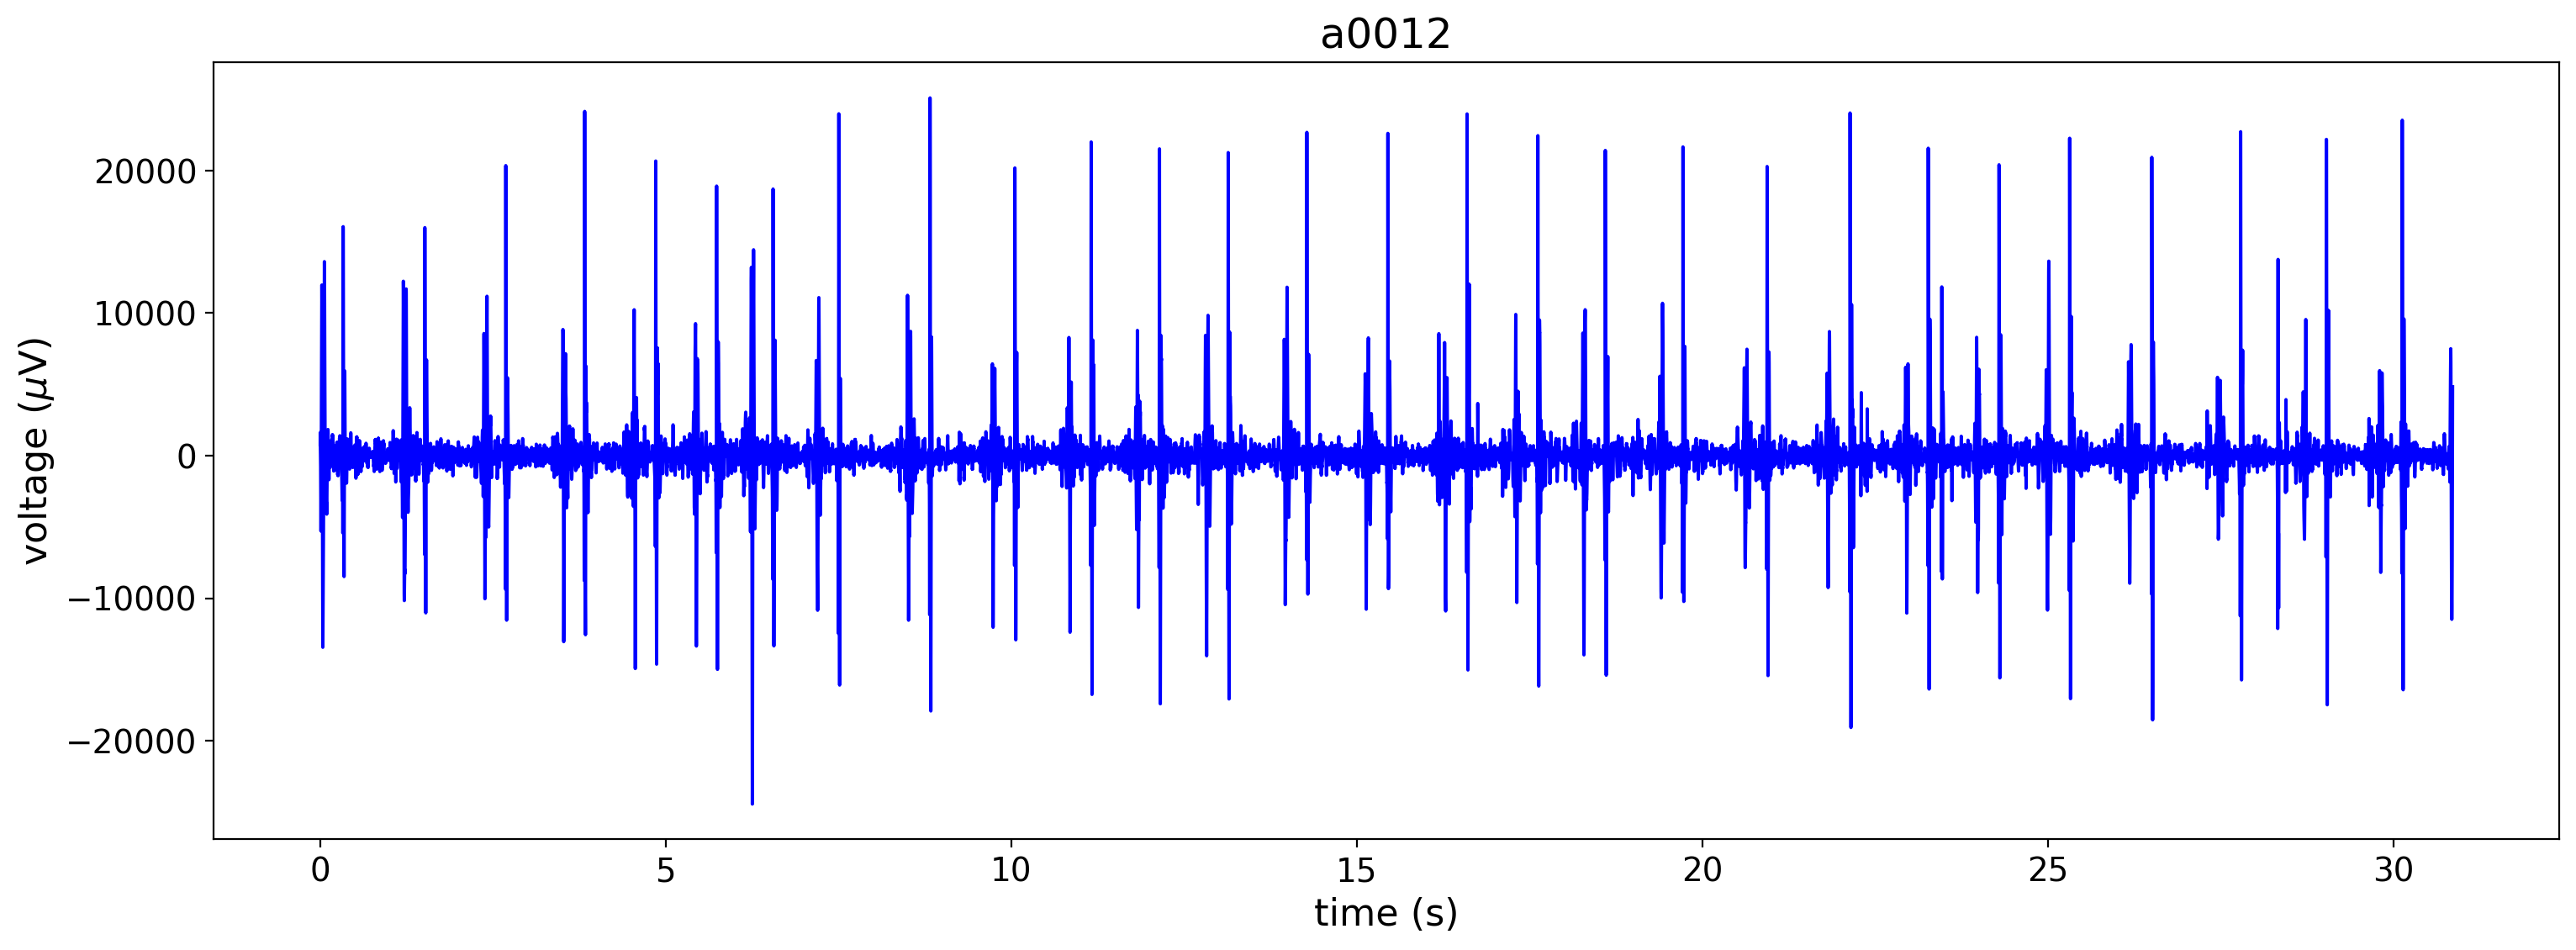

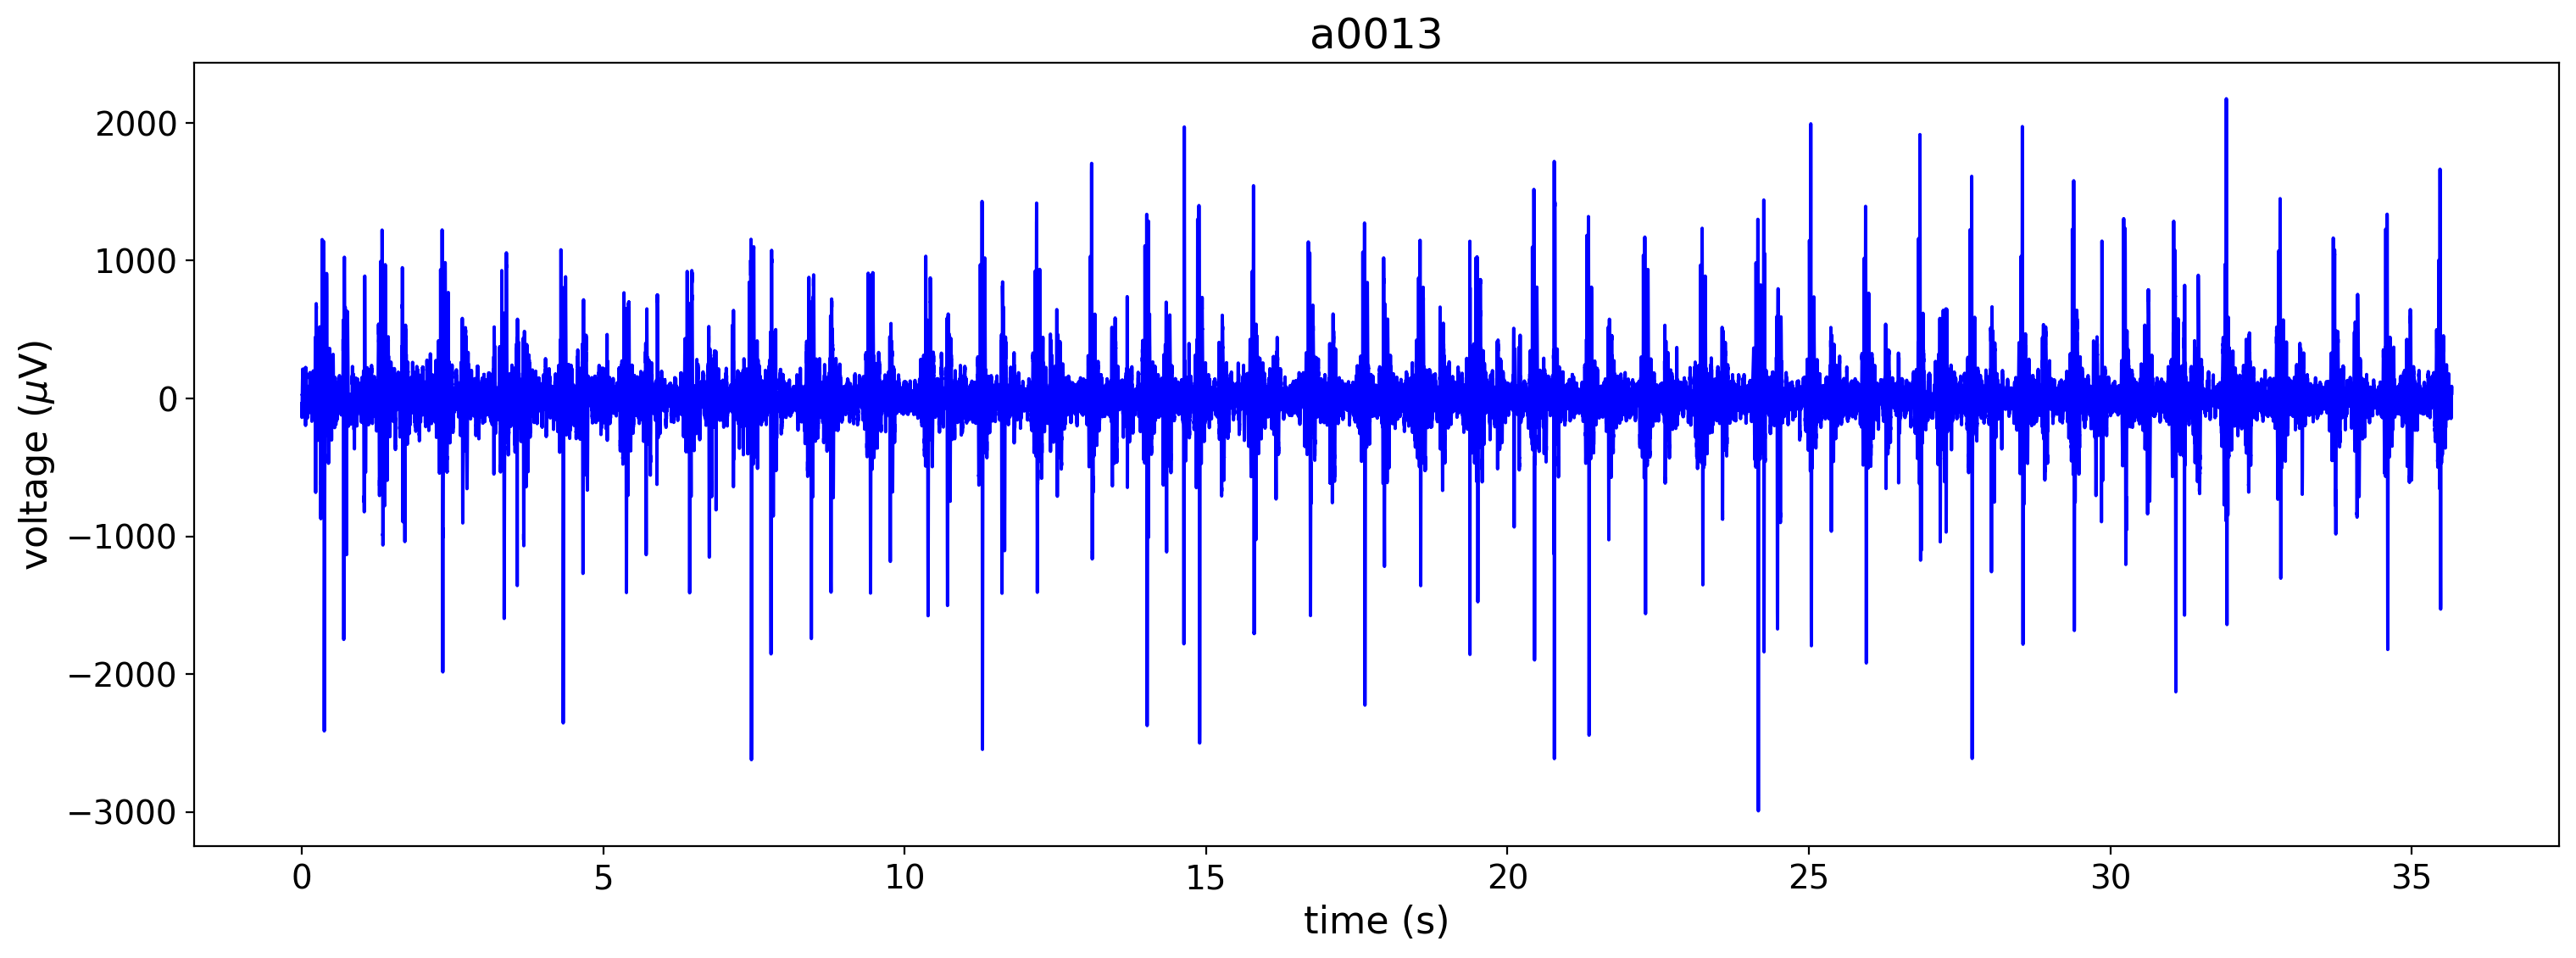

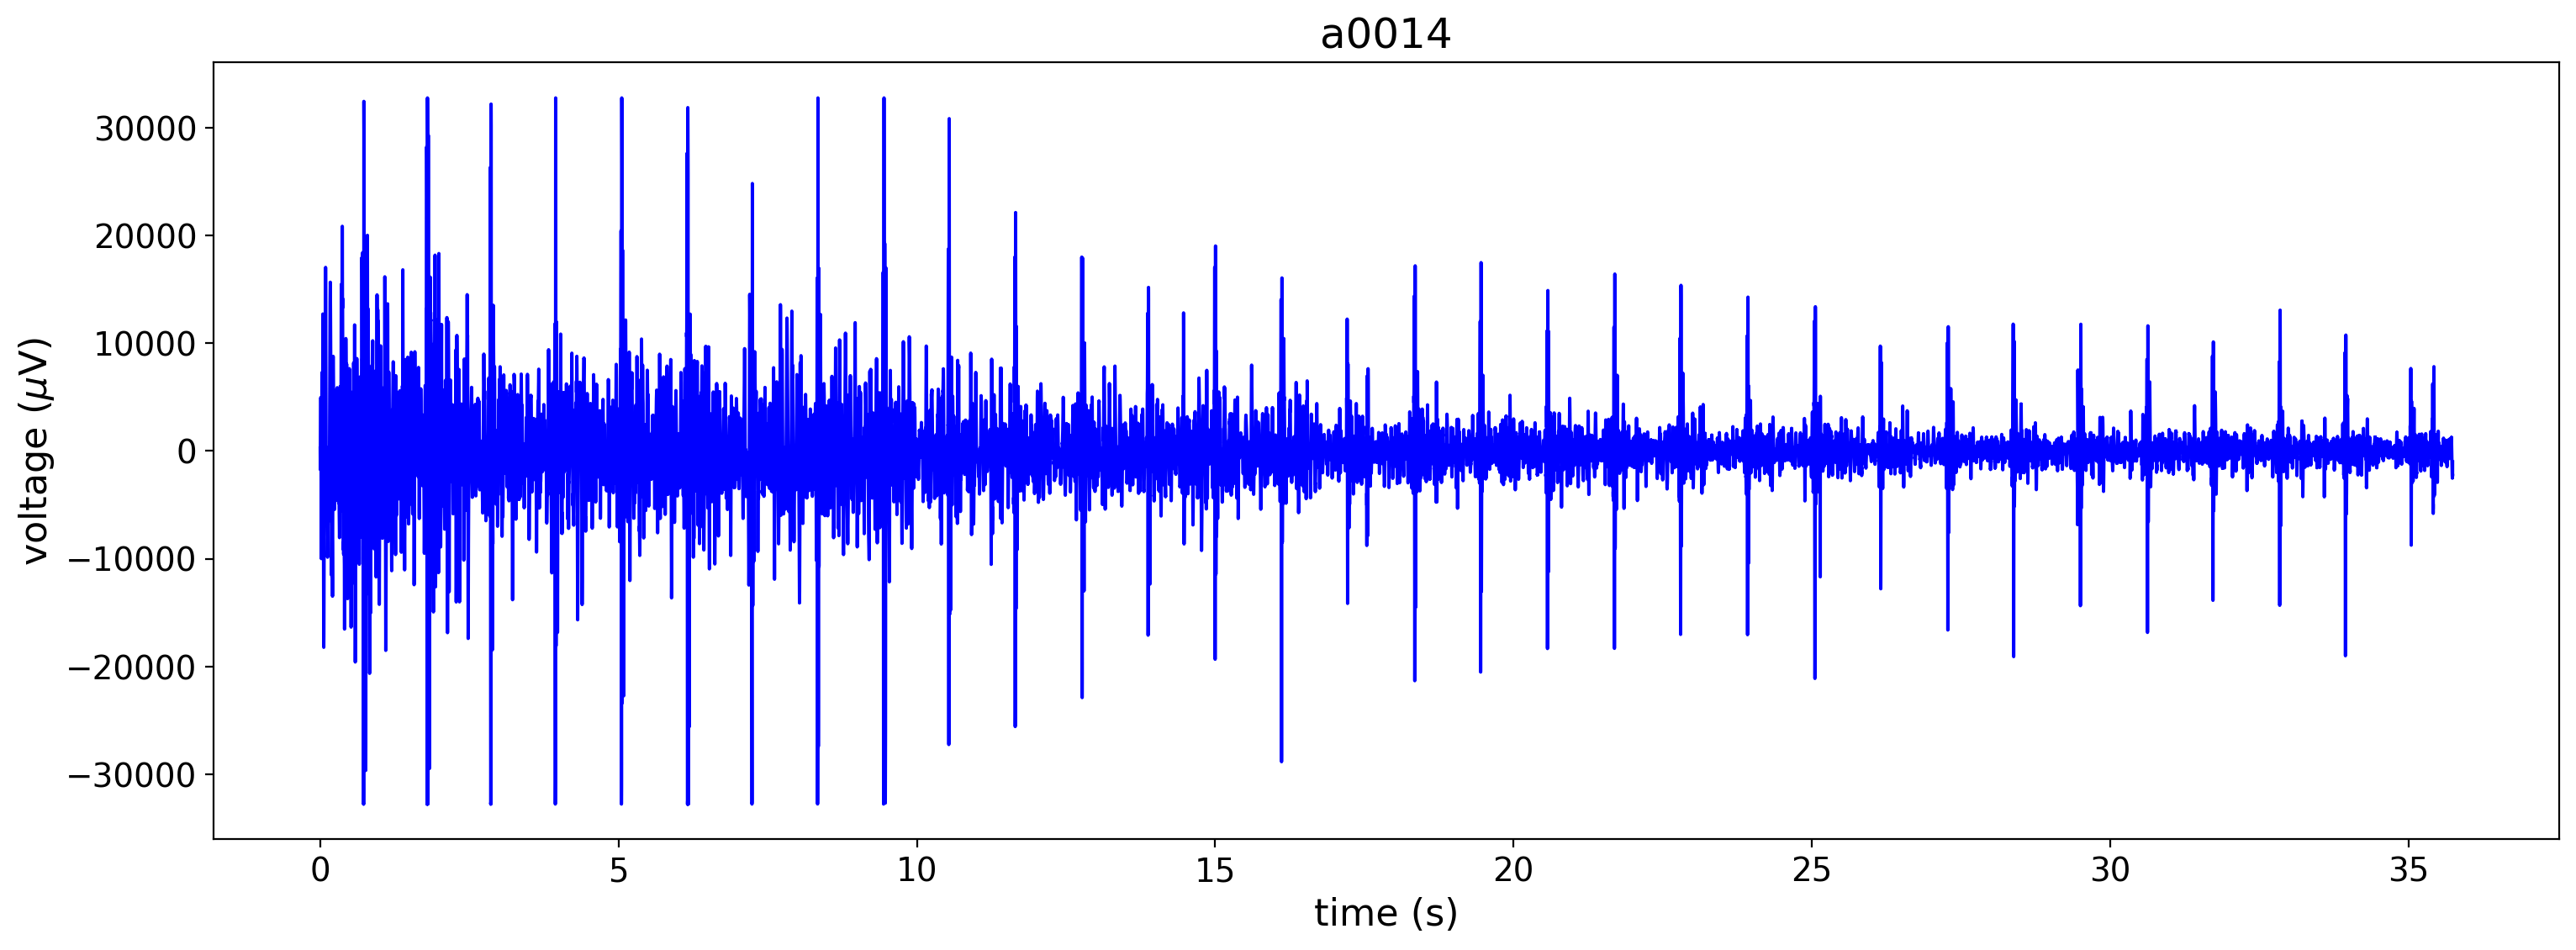

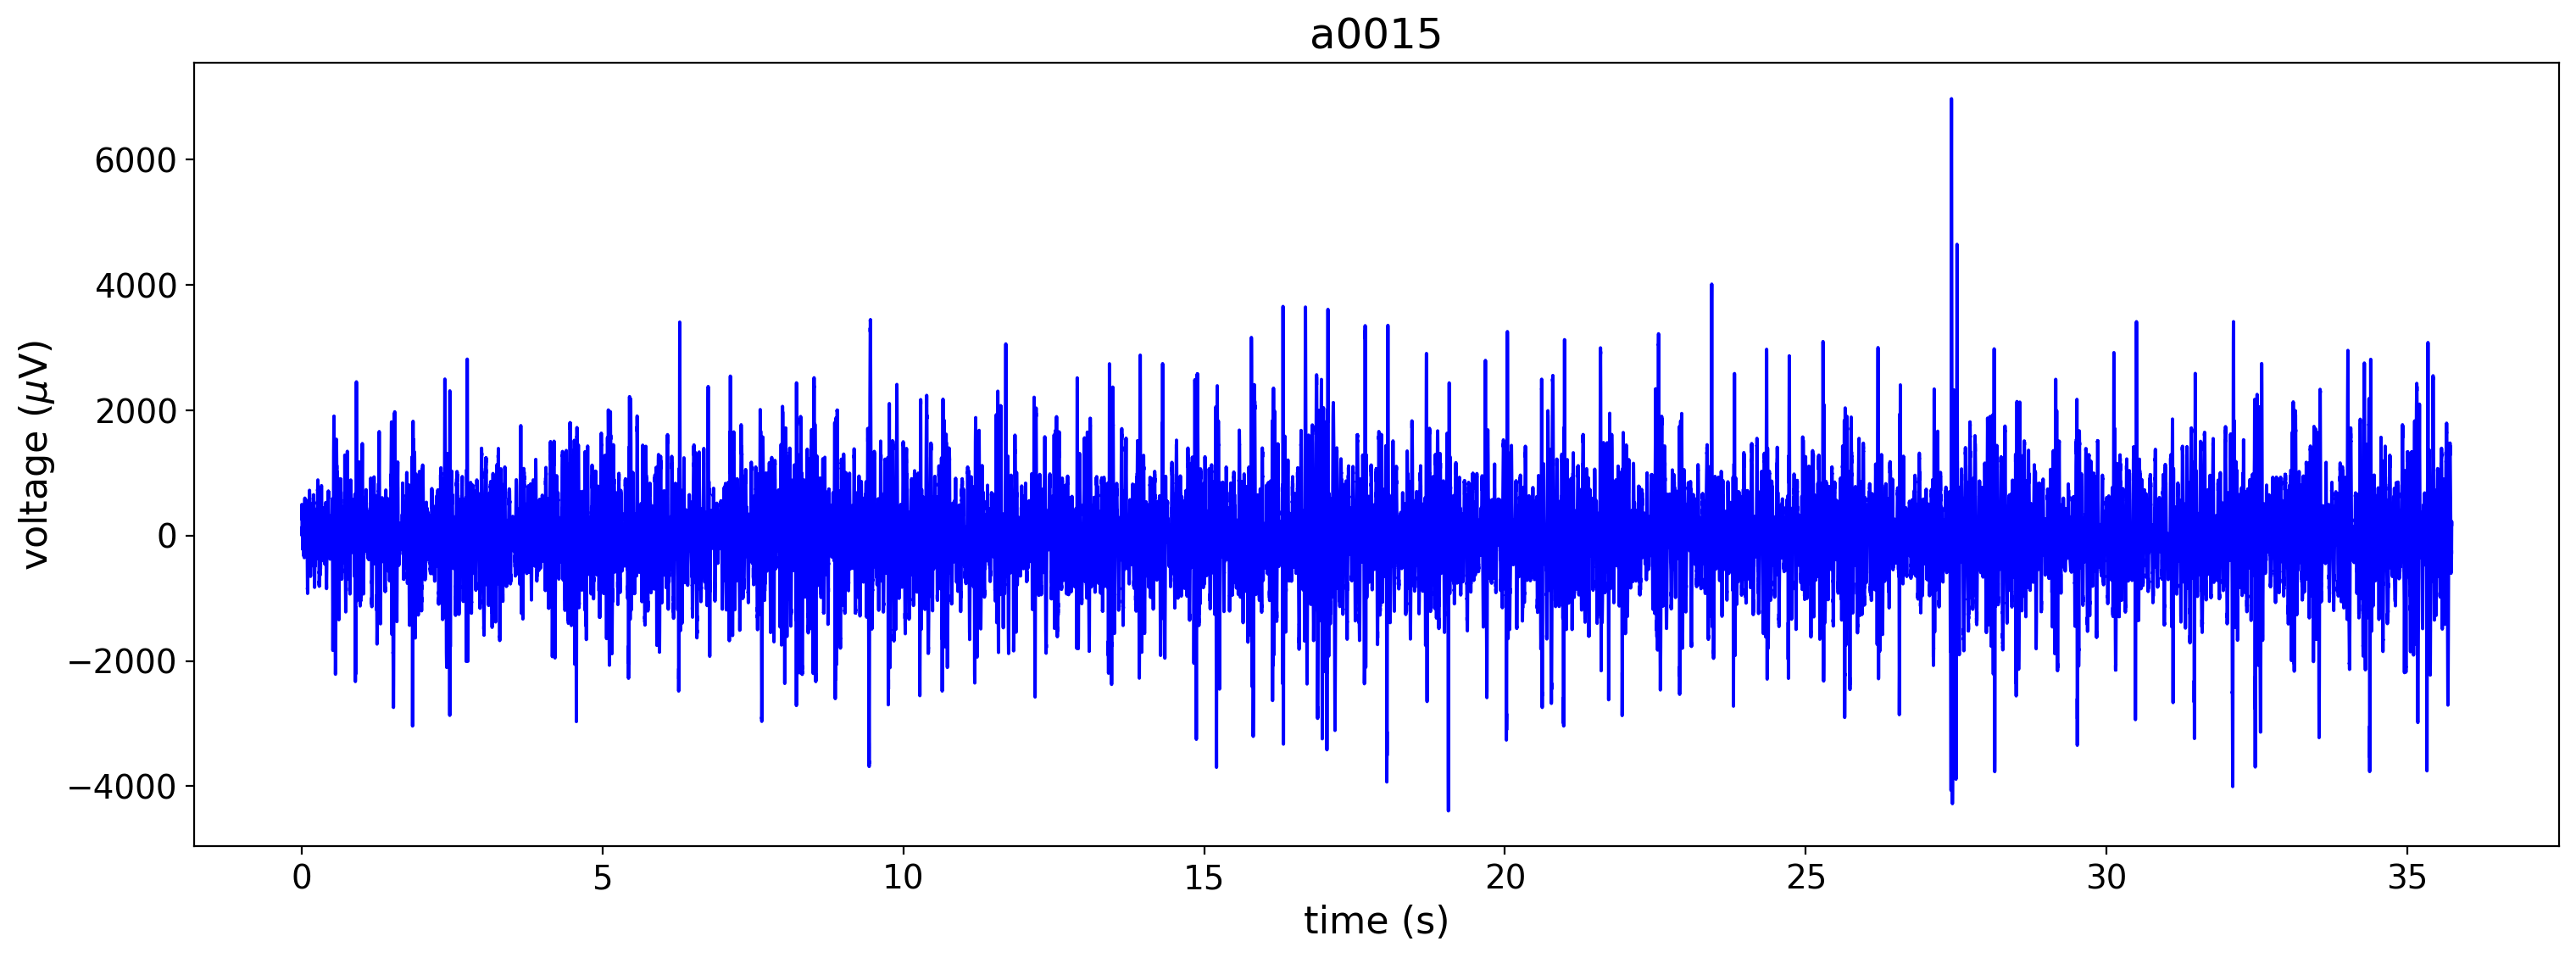

In [4]:
for i in range(0, len(nice)):
    timeECG, waveData = ecg(nice[i]+'.wav')
    # Plotting EMG signal
    plt.figure(figsize=(18,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeECG,waveData, 'b')
    plt.title(nice[i])
    plt.show()

# Advertencia de los desarrolladores del código 
Para que el algoritmo funcione correctamente, elija una grabación con las siguientes características:

- Línea de base estable.
- Los picos R deben ser superiores al valor máximo de la onda T.
- Los picos R tienen la misma amplitud en cada ciclo.



Por lo que se pudo ver al momento de analizar los audios .wav presentes en archivo adjunto en el enunciado del proyecto muy pocos o en realidad ninguno de los audios seleccionados cumplian con los requirimientos necesarios, segun los desarrolladores del programa por lo que se deduce que muchos de los inconvenientes sufridos a la hora de la realización del proyecto se atribuyen a las capacidades de análisis del algoritmo, por esta razón se obtienen valores de frecuencia cardiaca un poco extraños en algunos audios y los gráficos de correspondientes a la sección de frecuencia cardiaca presentan anomalías que se vuelven un poco complicadas de entender y solucionar.


Seguidamente se grafica una parte  de la señal para ver sus características de una forma más detallada.

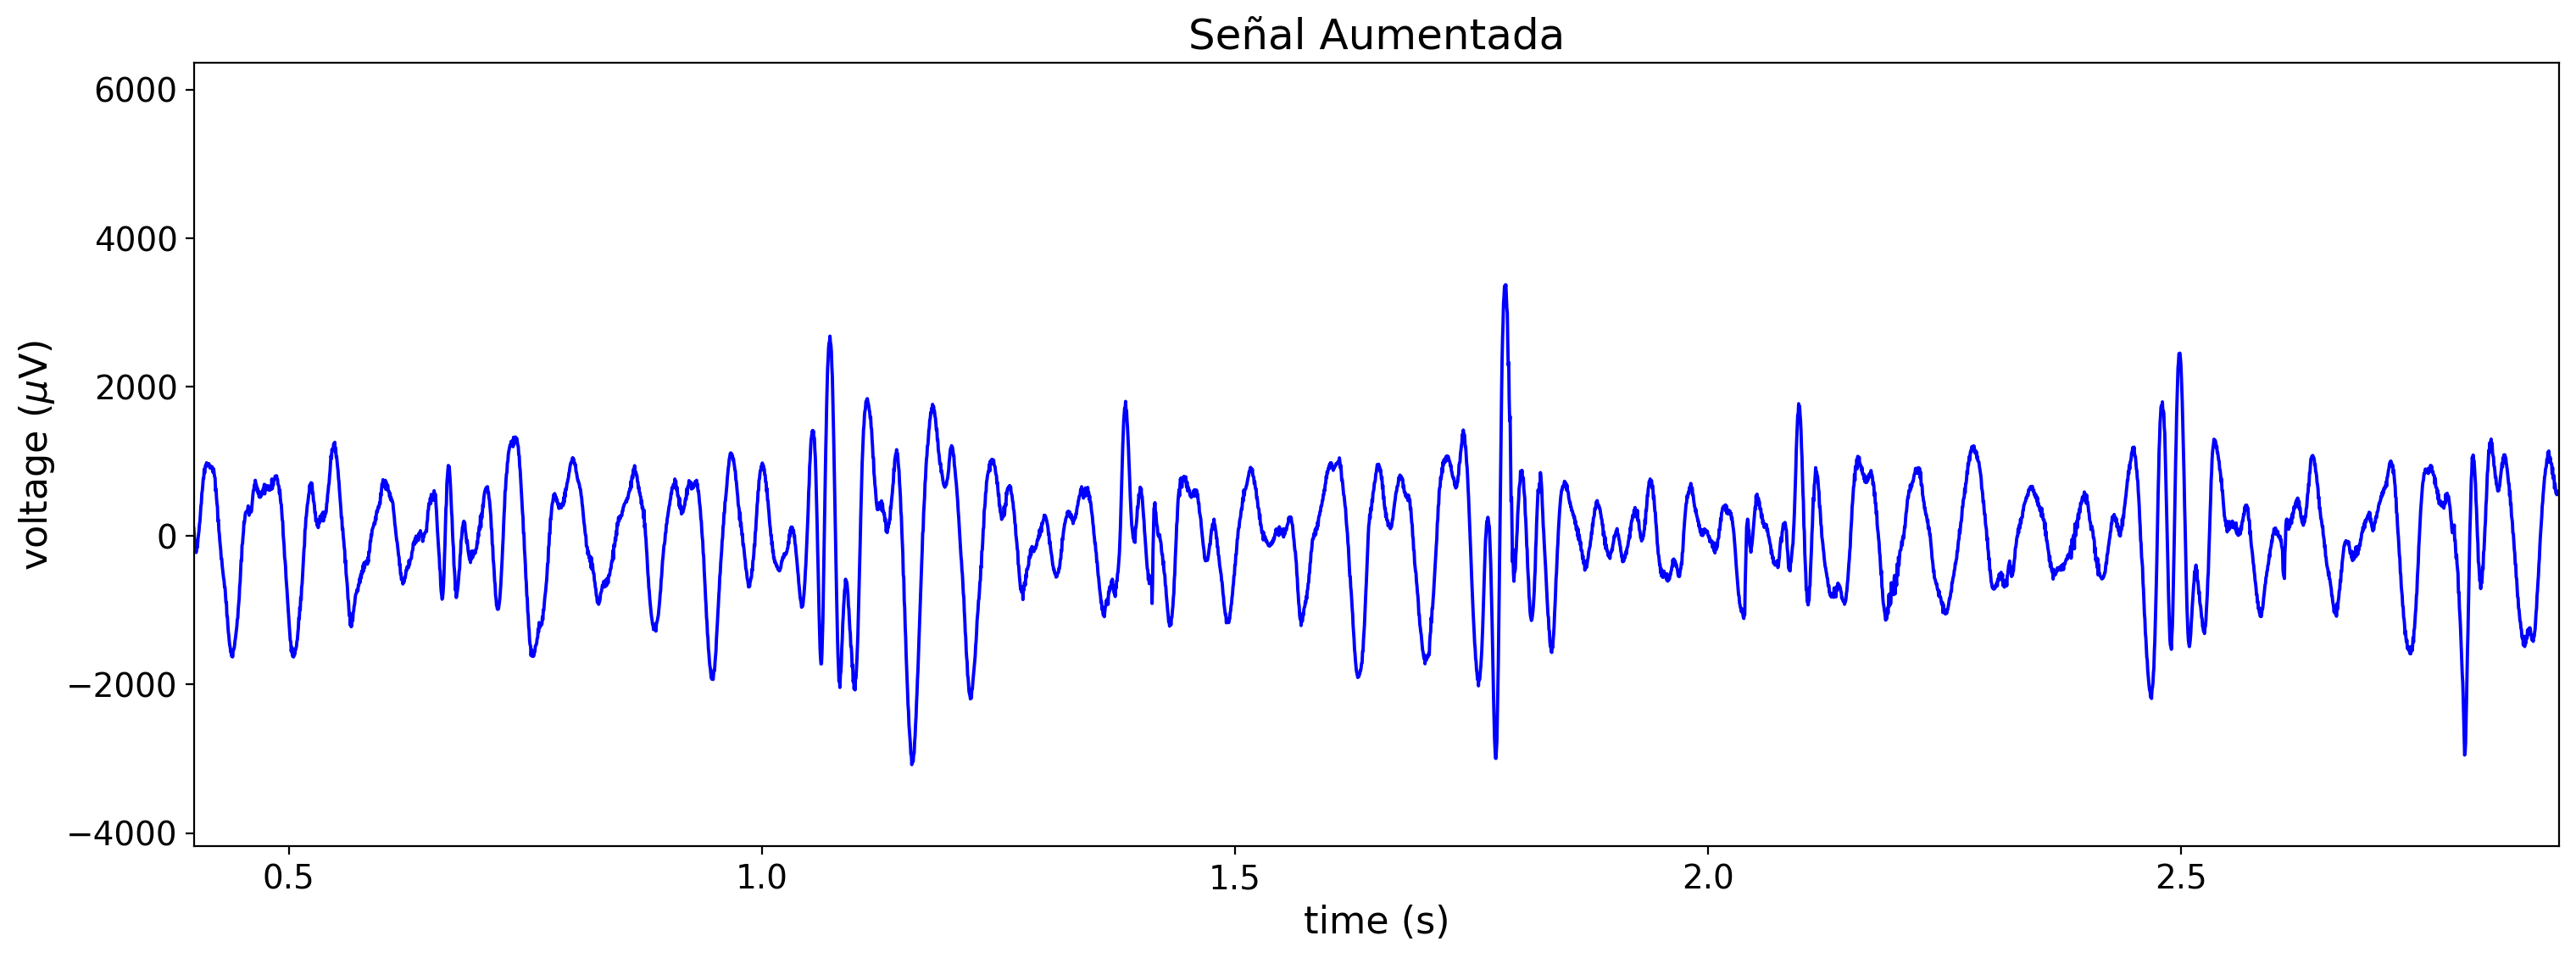

In [5]:
#Obtaining data
timeECG, waveData = ecg("a0008.wav")

# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(.40,2.9)
plt.title("Señal Aumentada")
plt.show()

# Advertencia de los desarrolladores del código 
Para que el algoritmo funcione correctamente, necesitaremos cortar la grabación. Queremos tener ciclos completos, así que encuentre el tiempo antes de que comience la primera onda P ``n1`` y el tiempo después de la última onda T ``n2``. Tenga en cuenta que si tiene ruido en su grabación, también desea cortar esa parte.

Fue muy difícil determinar la primera onda P y la última onda T en las señales seleccionadas ya que contaban con información muy irregular y poco clara. 

Una forma de aplicar los conocimientos del curso en esta sección sería aplicando procesamiento de señales para así poder modificar estas señales para que cumplan con los requerimientos de los desarrolladores.



Ahora, se grafica la señal de ECG sin procesar.

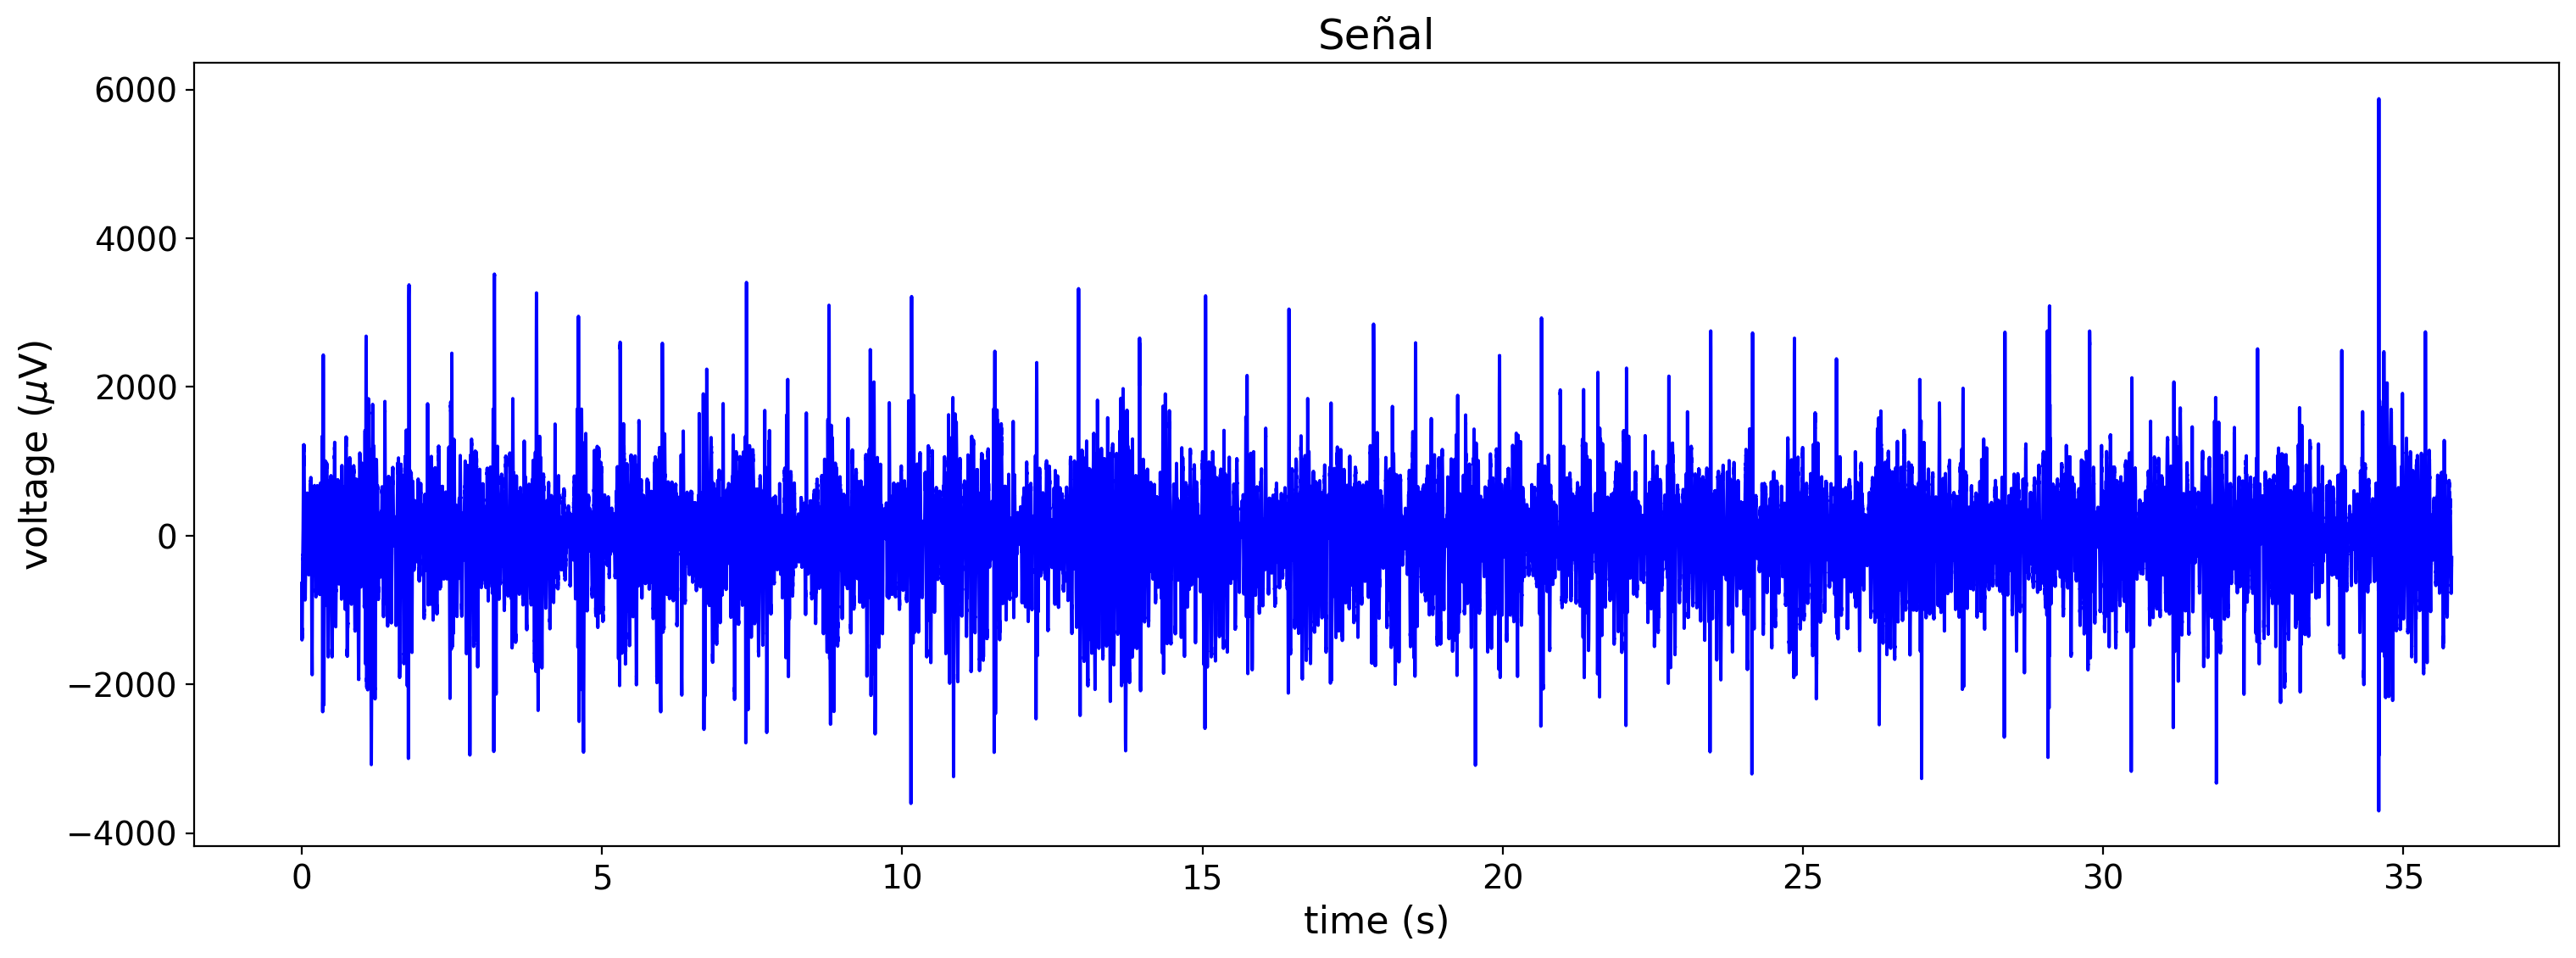

In [6]:
# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.title("Señal")
plt.show()

Se define el intervalo en el que se va a analizar la señal en mi caso decidí utilizar en la mayoría de análisis un intervalo cercano a los 5 segundos ya que así me aseguraba evitar los cambios tan drásticos que sufren las señales seleccionadas. Modificando el valor de n1 y n2 logramos crear los extremos del intervalo que necesitamos.

In [7]:
#Seconds at which we are going to cut the recording
n1 = 0
n2 = 1

m1 = int(n1*10000)
m2 = int(n2*10000)

print(timeECG[m1])
print(timeECG[m2])

0.0
5.0000698226504685


Ahora, se grafica la señal de ECG sin procesar pero ahora recortada.

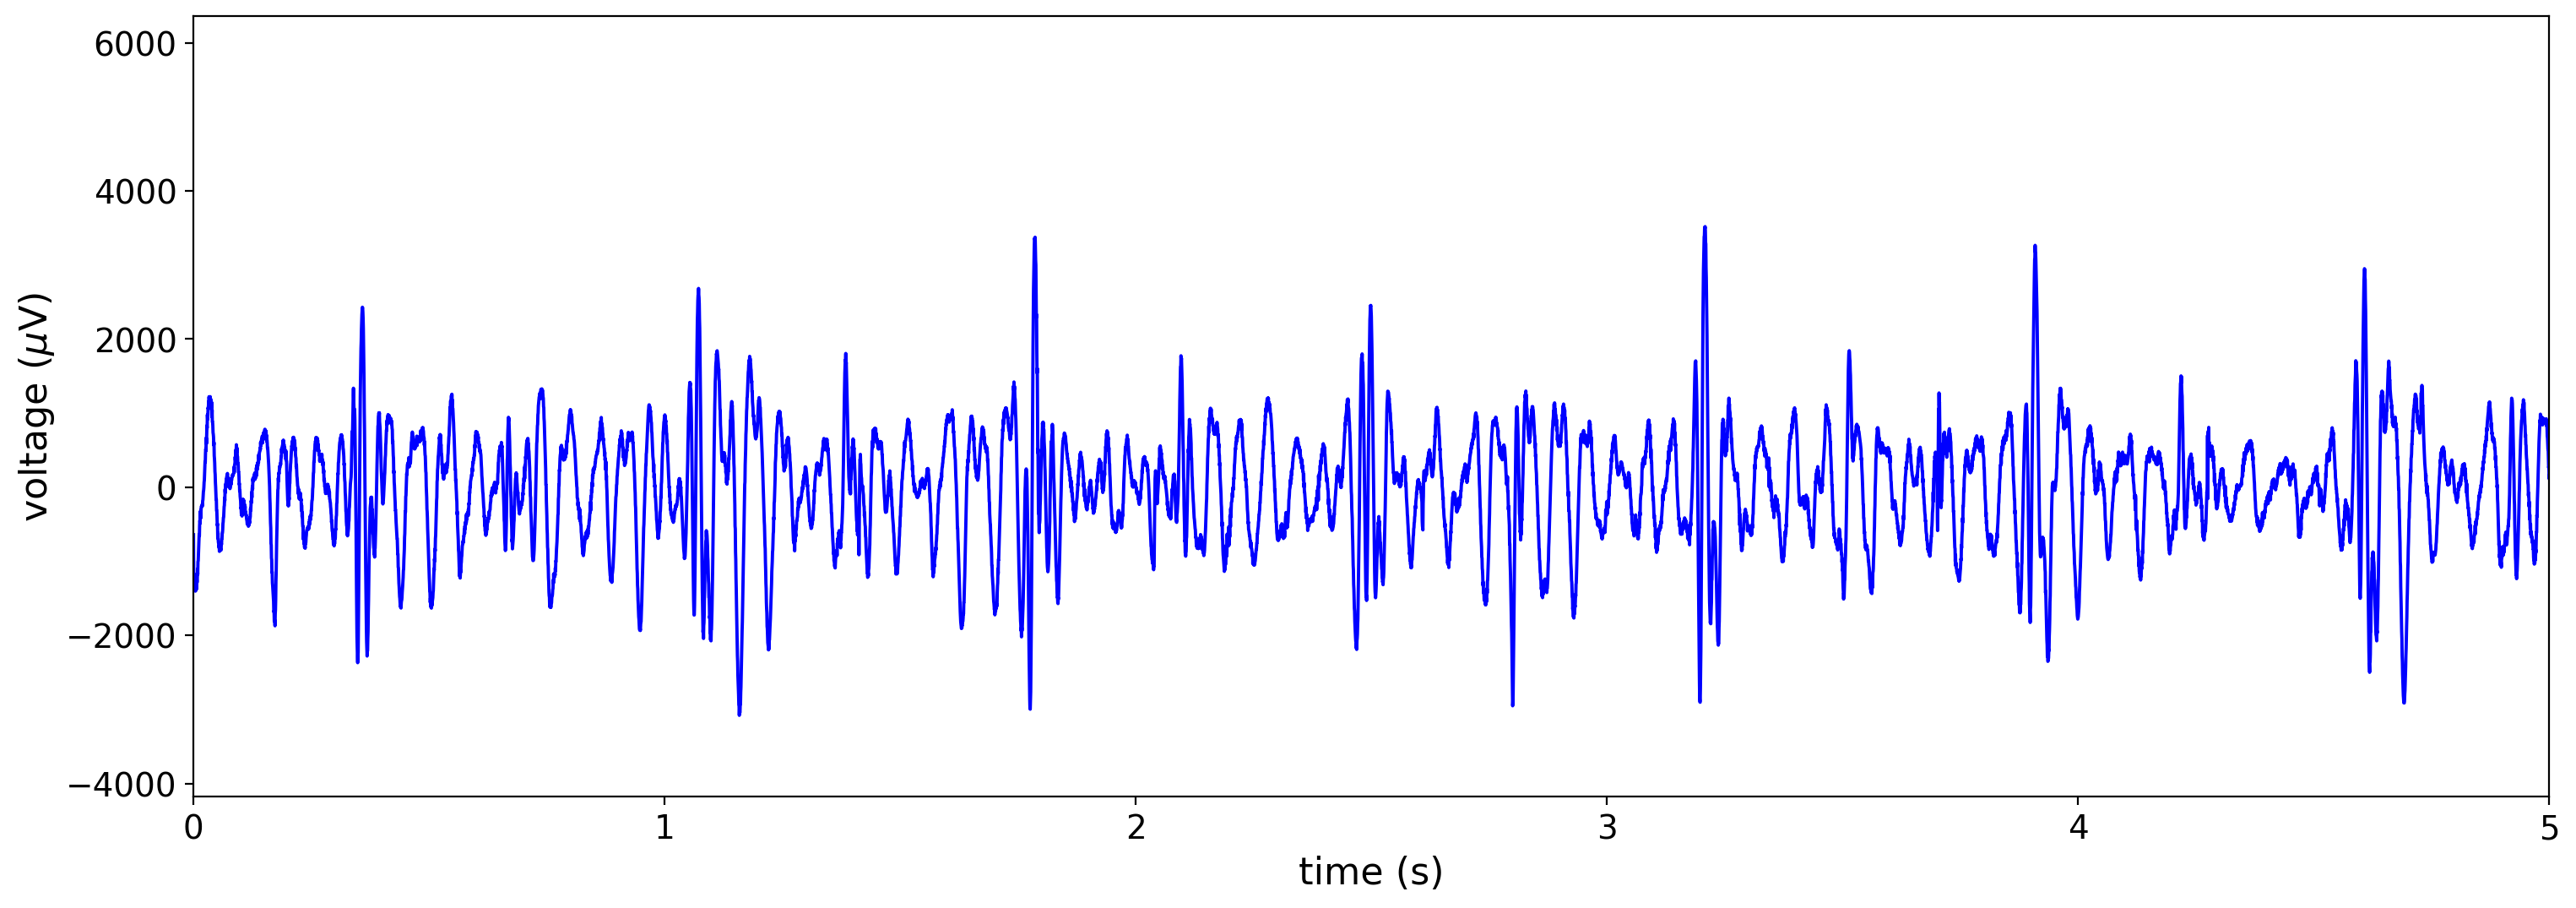

In [8]:
# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(timeECG[m1],timeECG[m2])
plt.show()

Se corta la señal para que su amplitud sea la correcta.

In [9]:
timeECG, waveData = timeECG[m1:m2], waveData[m1:m2]

Graficando la señal ECG sin procesar pero bien definida en su intervalo y amplitud requerida para el procesamiento.

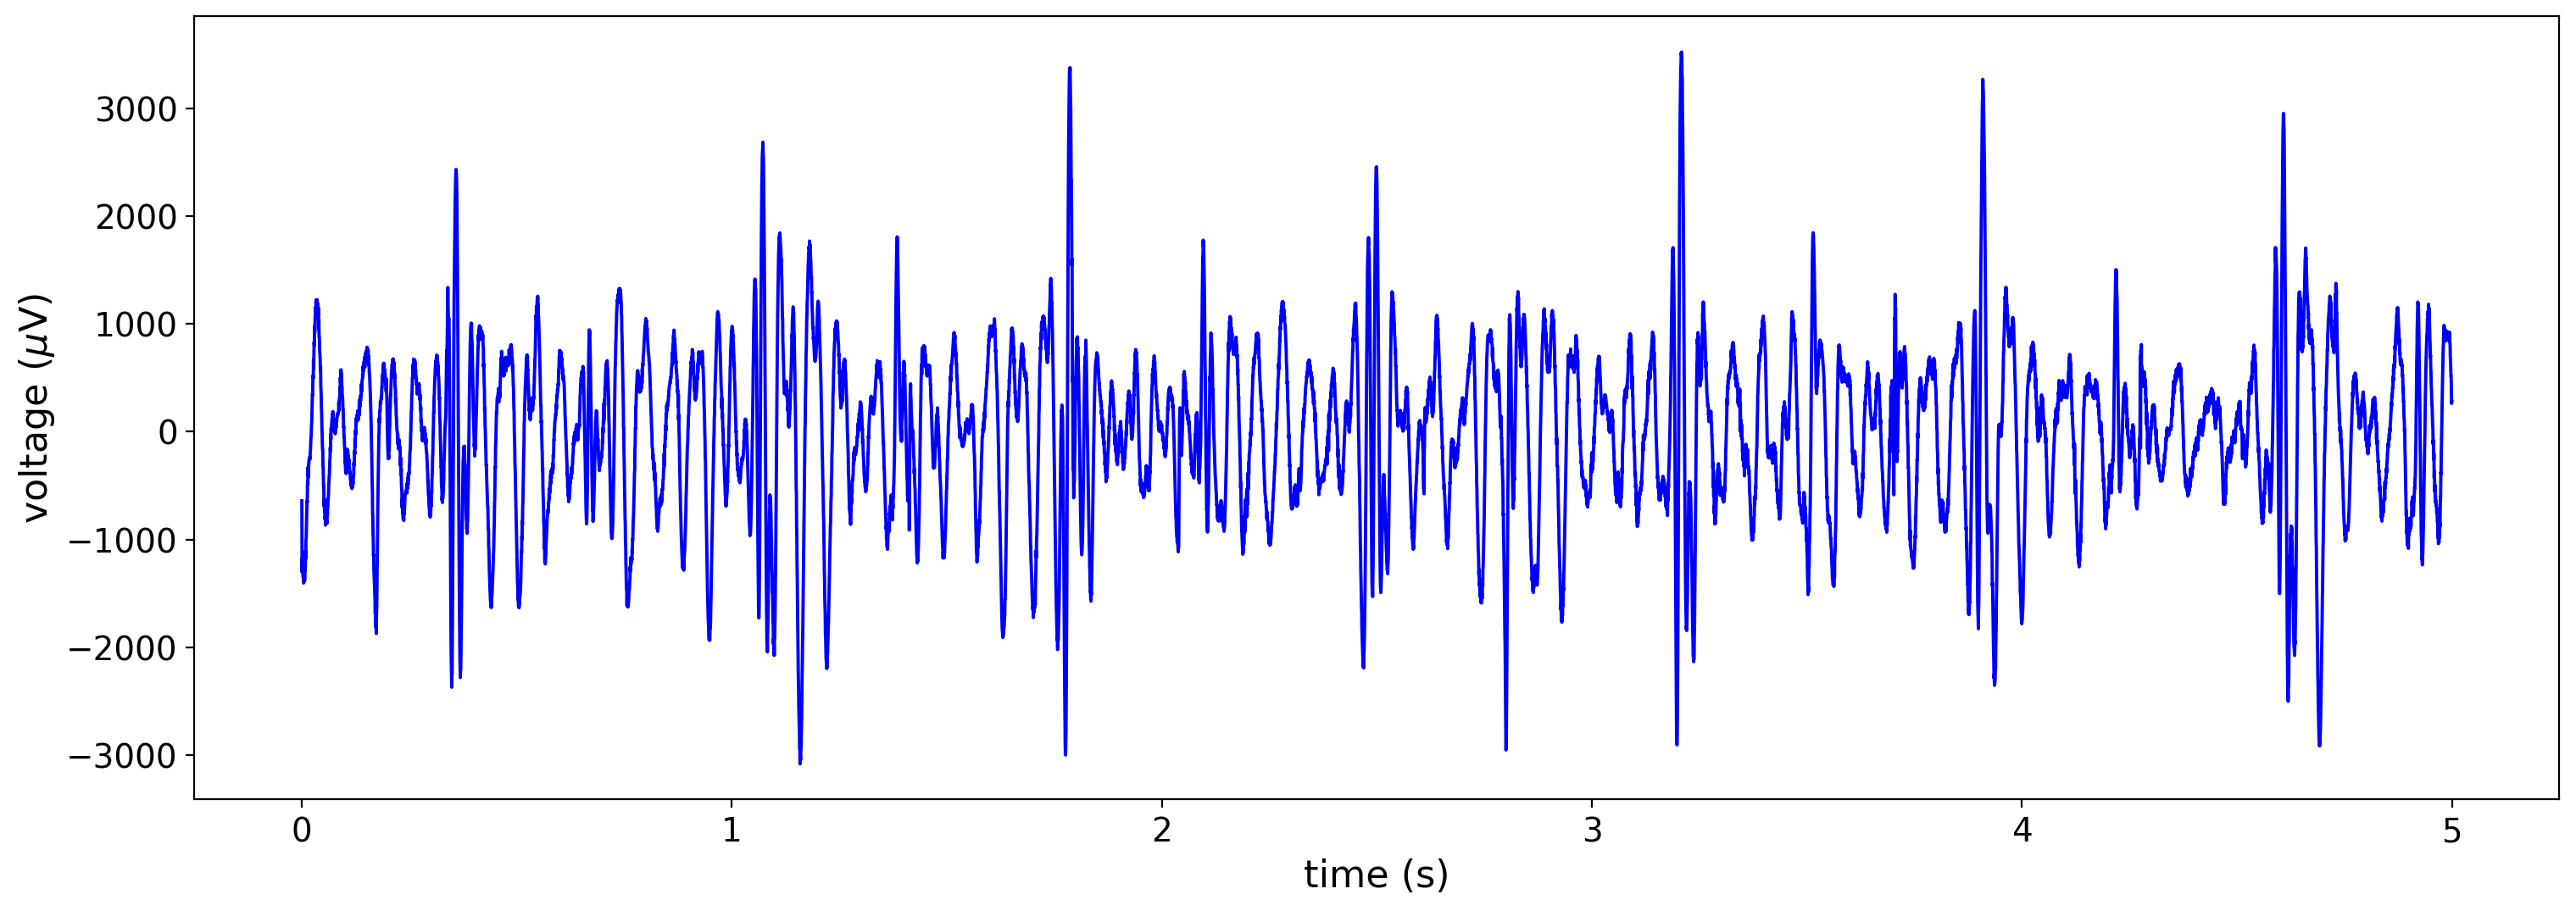

In [10]:
# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.show()

# Descripción de los desarrolladores
# Algoritmo para detectar componentes de ECG

La idea que subyace a este algoritmo es encontrar un buen registro de ECG.

Luego, detectar los valores máximos (picos R) en una determinada ventana de tiempo (en función de un umbral).

Posteriormente, en base a ciertos retardos de tiempo desde el pico R, obtendremos otras partes de la señal periódica.

Estos componentes pueden ser valores mínimos (Q y S) o obtendremos la derivada del tiempo y detectaremos cuando se produce un punto de inflexión (onda P y onda T).


# Picos R

Gracias a la detección de los pico R, podemos calcular la frecuencia cardíaca y los intervalos R-R.

La siguiente función crea una matriz de valores que superan un cierto umbral. Luego, determina el valor máximo de esta matriz y lo agrega en el vector R. Y esto se repite hasta el final de la serie temporal.

In [11]:
def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.6):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData): #Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")
    
    interval = max(waveData) 
    threshold = threshold_ratio*interval
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False
    
    for i in range(0, len(waveData)):
            
        if waveData[i] >= threshold:#If a threshold value is surpassed,
            # the indices and values are saved 
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])
            
        elif banner == True and waveData[i] < threshold: #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False     

    return mxs_indices

Graficando la señal de ECG procesada y obteniendo sus picos R.

In [12]:
mxs_indices = detecta_maximos_locales(timeECG, waveData)

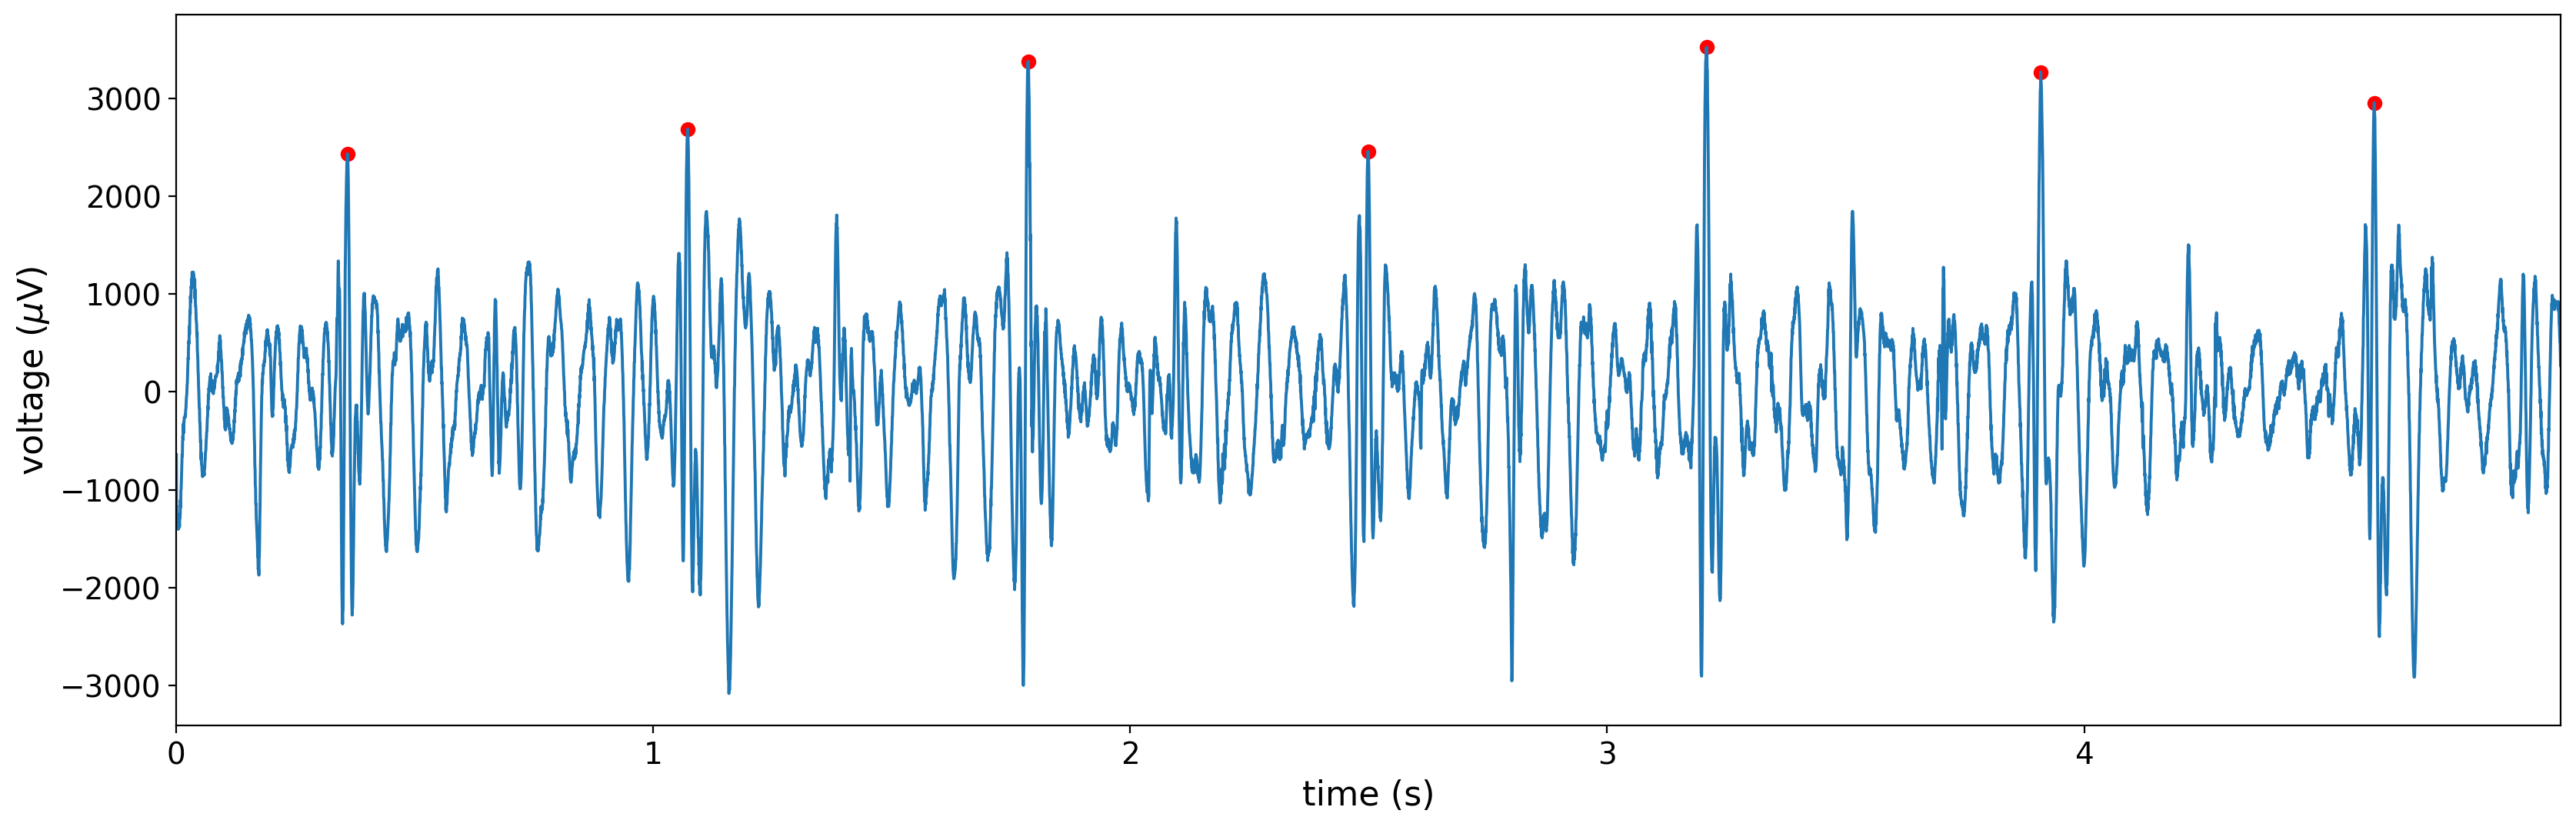

In [13]:
plt.figure(figsize=(20,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()

Mirando de cerca la señal para lograr ubicar bien sus Picos R, ondas P y ondas T.

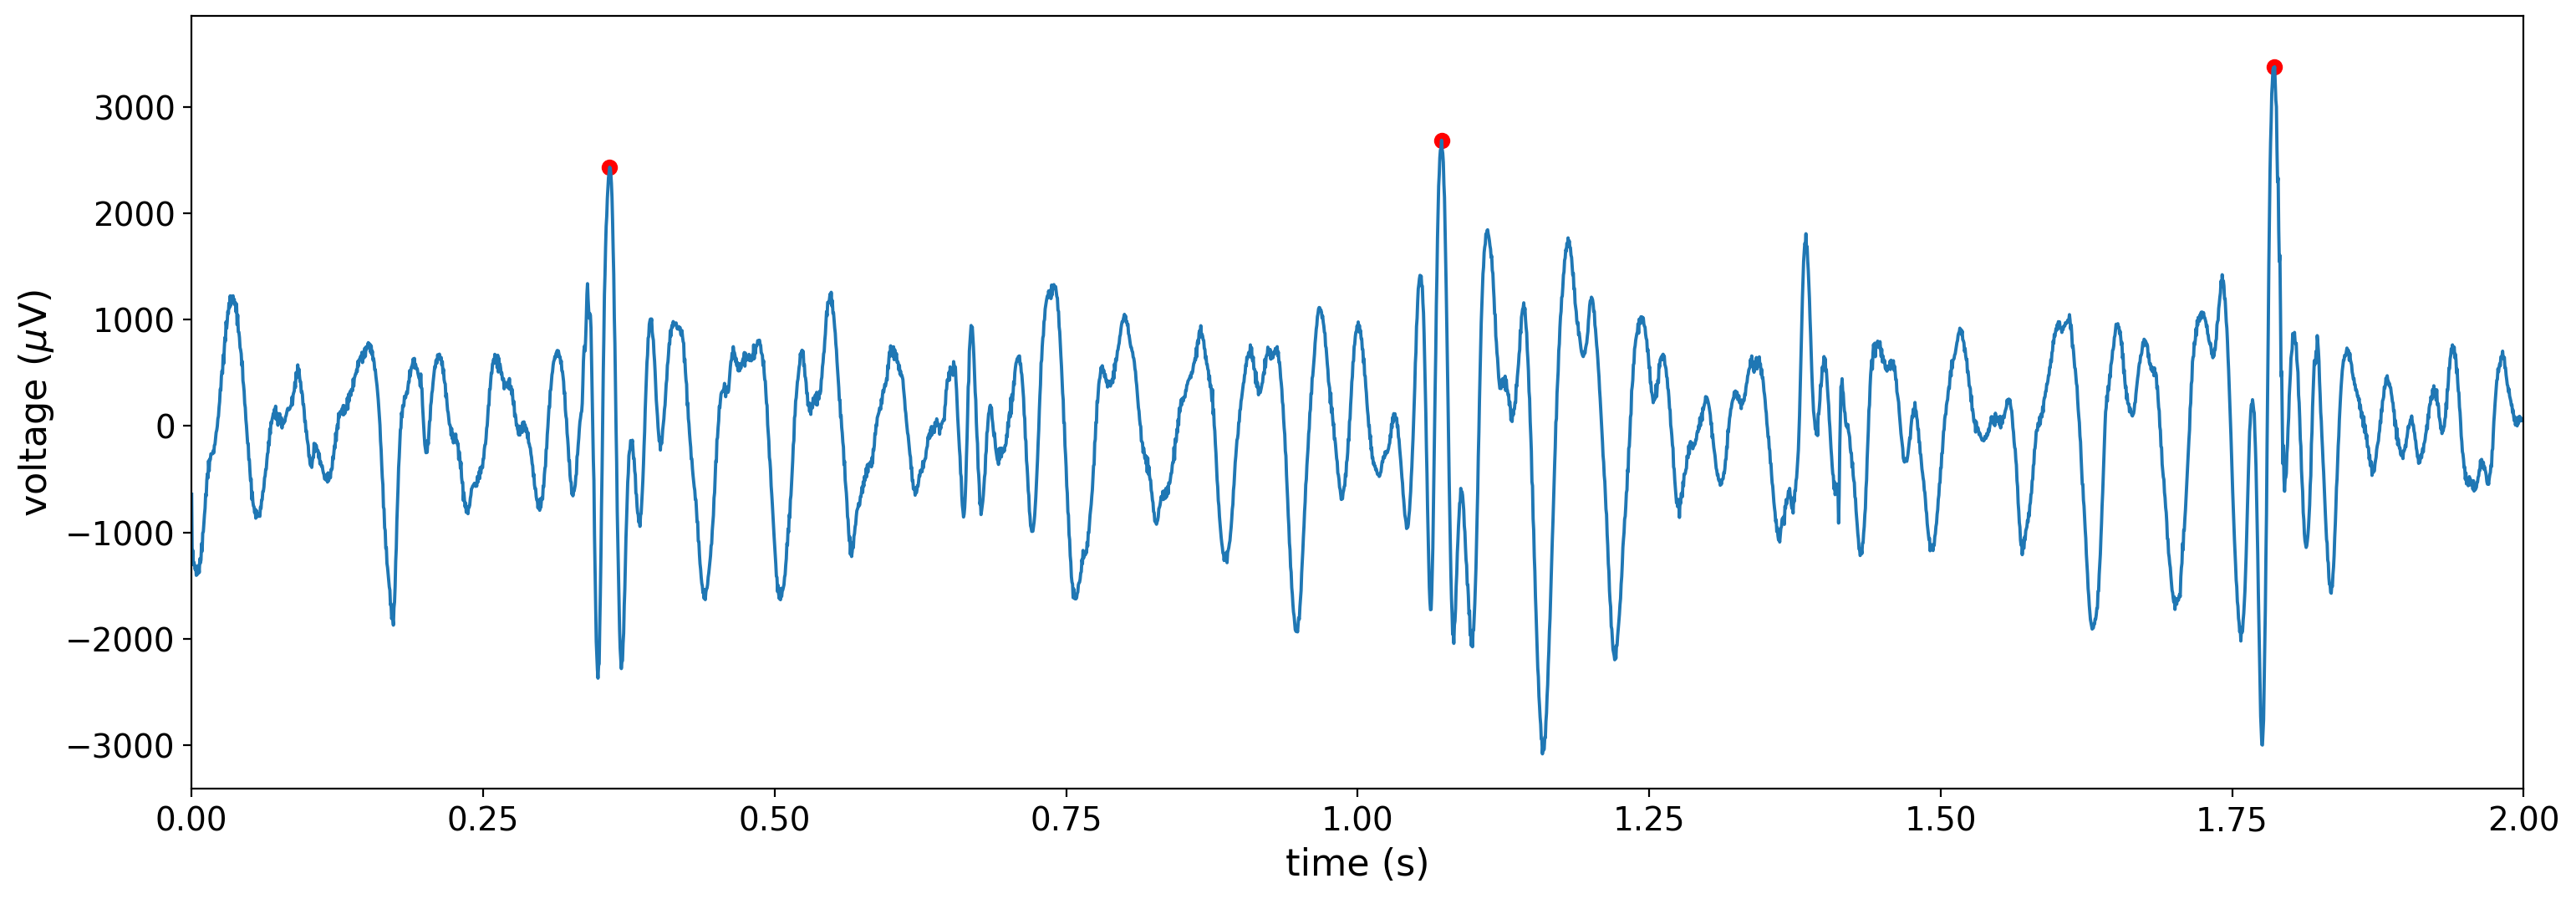

In [14]:
# Close up from an initial second to an end second
init_sec = 0
end_sec = 4
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(timeECG[init_sec*1000],timeECG[end_sec*1000])
plt.plot(timeECG[init_sec*1000:end_sec*1000], waveData[init_sec*1000:end_sec*1000])
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()

# Frecuencia Cardiaca e intervalos entre los picos R-R

El programa toma la cantidad total de picos u Ondas R en el intervalo seleccionado por lo que según lo indagado si multiplicamos ese número por 60 segundos y lo dividimos por el tiempo que duró el intervalo obtendremos los latidos por minuto de forma aproximada.

In [15]:
mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Beats per minute:", mean_bpm)

Beats per minute: 84.00722771862445


In [16]:
heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
time = timeECG[mxs_indices]

mean_vec = [mean_bpm for i in range(0, len(time)-1)]
std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]

Graficando la frecuencia cardiaca tomando en cuenta cada latido, la desviación estándar y con eso se calcula un valor promedio del latido.

Los picos tan pronunciados y extraños que podemos observar en esta gráfica dependiendo de la señal que se analizó, se deben a que como vimos anteriormente el algoritmo cuenta con capacidades específicas por lo que sí le brindamos señales tan poco claras y desordenadas en comparación a las utilizadas por los desarrolladores suceden errores en la obtención y graficación de resultados.

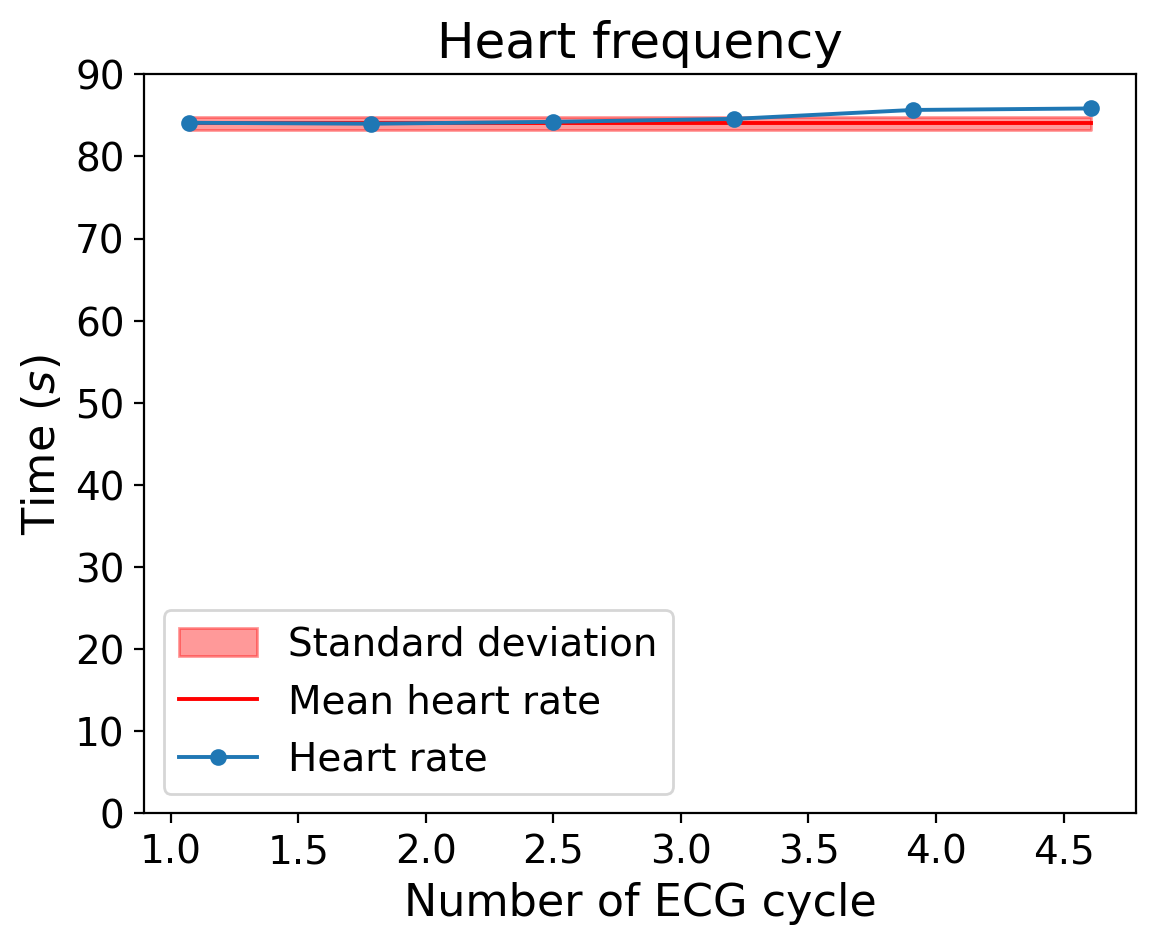

In [18]:
plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Standard deviation", color='red', alpha=0.4)
plt.plot(time[1:], mean_vec, c="r", label = "Mean heart rate")
plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Heart rate")
plt.ylim((0, 90))
plt.title("Heart frequency")
plt.xlabel(r'Number of ECG cycle')
plt.ylabel(r'Time ($s$)')
plt.legend()
plt.show()

# Referencias de los desarrolladores

[BackyardBrains, 2017] BackyardBrains (2009-2017). Experiment: Heart Action Potentials. https://backyardbrains.com/experiments/heartrate. Accessed December 20, 2019.

[Boron and Boulpaep, 2012] Boron, W. F. and Boulpaep, E. L. (2012). Medical physiology, 2e updated edition e-book: with student consult online access. Elsevier health sciences.

[Cadogan, 2019] Cadogan, M. (2019). PR Interval. https://litfl.com/pr-interval-ecg-library/ Accessed May 8, 2020.

[ECGpedia, 2013] ECGpedia (2013). Conduction. https://en.ecgpedia.org/wiki/Conduction. Accessed May 7, 2020.

[Kantz and Schreiber, 2004] Kantz, H. and Schreiber, T. (2004). Nonlinear time series analysis, volume 7. Cambridge university press.

[Larkin, 2019] Larkin, J. (2019). QRS Interval. https://litfl.com/qrs-interval-ecg-library/. Accessed May 8, 2020.

[Nurses Learning, 1999] Nurses Learning (1999). EKG Interpretation. https://www.nurseslearning.com/courses/nrp/nrp1619/Section%202/index.htm. Accessed May 7, 2020.

